INSERTING ALL THE NECESSARY LIBRARIES

In [722]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [723]:
df=pd.read_csv("database.csv")

In [724]:
print(f"SHAPE OF THE DATASET - {df.shape}")

SHAPE OF THE DATASET - (907, 27)


In [725]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


MAKING LIST OF THE COLUMNS

In [726]:
lis=df.columns.tolist()

In [727]:
print(lis)

['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2', 'other_fuel3', 'commissioning_year', 'owner', 'source', 'url', 'geolocation_source', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'generation_data_source', 'estimated_generation_gwh']


INFORMATION ABOUT THE DATASET
-----------------------

In [728]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

CHECKING FOR THE NULLS
----------------------

In [729]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

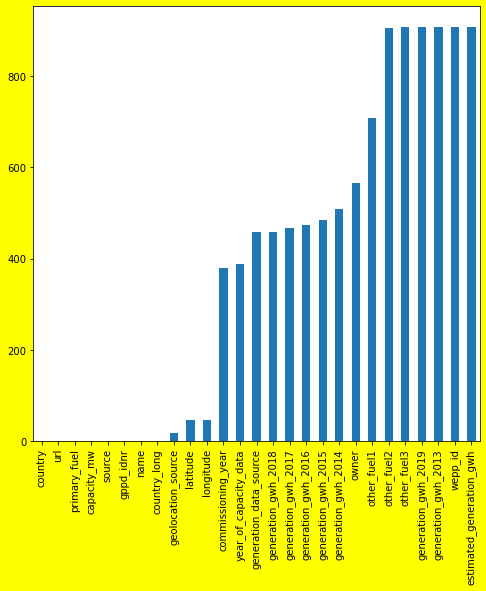

In [730]:
plt.figure(figsize=(8,8),facecolor='Yellow')
df.isnull().sum().sort_values().plot(kind='bar')
plt.show()

In [731]:
feat=[]
percent_nulls=[]

In [732]:
for i in df:
    feat.append(i)
    na=df[i].isnull().sum()
    perc=round((na/907)*100,2)
    percent_nulls.append(perc)
pn=pd.DataFrame({'FEATURE':feat,'PERCENTAGE_NULLS_PRESENT':percent_nulls})
pn


,FEATURE,PERCENTAGE_NULLS_PRESENT
0,country,0.00
1,country_long,0.00
2,name,0.00
3,gppd_idnr,0.00
4,capacity_mw,0.00
5,latitude,5.07
6,longitude,5.07
7,primary_fuel,0.00
8,other_fuel1,78.17
9,other_fuel2,99.89


CHECKING THE DATATYPES

In [733]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [734]:
cat_col=[]
cont_col=[]
#making a list for categorical_columns-cat_col
#making a list for continuous columns -cont_col

In [735]:
for i in df:
    if(df[i].dtypes)=='O':
        cat_col.append(i)
    else:
        cont_col.append(i)

MAKING A DATAFRAME FOR DETERMINING UNIQUENESS/UNIQUE_SUB_CATEGORIES IN EACH CATEGORICAL COLUMN

In [736]:
FEATURE=[]
UNIQUE_SUBCATEGORIES=[]
TOTAL_UNIQUE_SUBCATEGORIES=[]
PN=[]
UNIQUENESS_PERCENT=[]

In [737]:
for i in cat_col:
    FEATURE.append(i)
    uni=df[i].unique()
    UNIQUE_SUBCATEGORIES.append(uni)
    TOTAL_UNIQUE_SUBCATEGORIES.append(len(uni))
    na=df[i].isnull().sum()
    perc=round((na/907)*100,2)
    PN.append(perc)

In [738]:
uq=pd.DataFrame({"FEATURE":FEATURE,"UNIQUE_SUBCATEGORIES":UNIQUE_SUBCATEGORIES,"TOTAL_UNIQUE_SUBCATEGORIES":TOTAL_UNIQUE_SUBCATEGORIES,"PERCENTAGE NULLS":PN})

In [739]:
uq

,FEATURE,UNIQUE_SUBCATEGORIES,TOTAL_UNIQUE_SUBCATEGORIES,PERCENTAGE NULLS
0,country,[IND],1,0.00
1,country_long,[India],1,0.00
2,name,"[ACME Solar Tower, ADITYA CEMENT WORKS, AES Sa...",907,0.00
3,gppd_idnr,"[WRI1020239, WRI1019881, WRI1026669, IND000000...",907,0.00
4,primary_fuel,"[Solar, Coal, Wind, Gas, Hydro, Biomass, Oil, ...",8,0.00
5,other_fuel1,"[nan, Oil, Cogeneration, Gas]",4,78.17
6,other_fuel2,"[nan, Oil]",2,99.89
7,owner,"[Solar Paces, Ultratech Cement ltd, AES, nan, ...",281,62.29
8,source,"[National Renewable Energy Laboratory, Ultrate...",191,0.00
9,url,[http://www.nrel.gov/csp/solarpaces/project_de...,304,0.00


DESCRIBING THE DATA
----------------------------
(CONTINUOUS COLUMNS)
-----------------------

In [740]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


IT CAN BE OBSERVED THAT<BR< OTHER_FUEL3<BR> ,WEPP_ID<BR>,GENERATION_GWH_2013<BR>,GENERATION_GWH_2019<BR>HAVE A COUNT OF ZERO AND ALL THE VALUES ARE NULL SO THESE COLUMNS HAVE TO BE DROPPED 

DESCRIBING THE DATA
-----------------
(CATGORICAL COLUMNS)
---------------------

In [741]:
df.describe(include='O')

,country,country_long,name,gppd_idnr,primary_fuel,other_fuel1,other_fuel2,owner,source,url,geolocation_source,generation_data_source
count,907,907,907,907,907,198,1,342,907,907,888,449
unique,1,1,907,907,8,3,1,280,191,304,3,1
top,IND,India,ACME Solar Tower,WRI1020239,Coal,Oil,Oil,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority
freq,907,907,1,1,258,195,1,4,519,519,765,449


ABOVE IS THE DETAILED DESCRIPTION OF THE CATEGORICAL COLUMNS<BR>
GPPD_IDNR HAVE TOTAL 907 UNIQUE ENTRIES IN 907 ROWS DEPICTING THAT ITS JUST LIKE SEQUENCE NUMBER AND HARDLY CONTRIBUTE IN PREDICTION OF (PRIMARY FUEL CLASSIFICATION OR CAPACITY_MW PREDICTION)
  

HEATMAp FOR DESCRIBING THE DATA<BR>

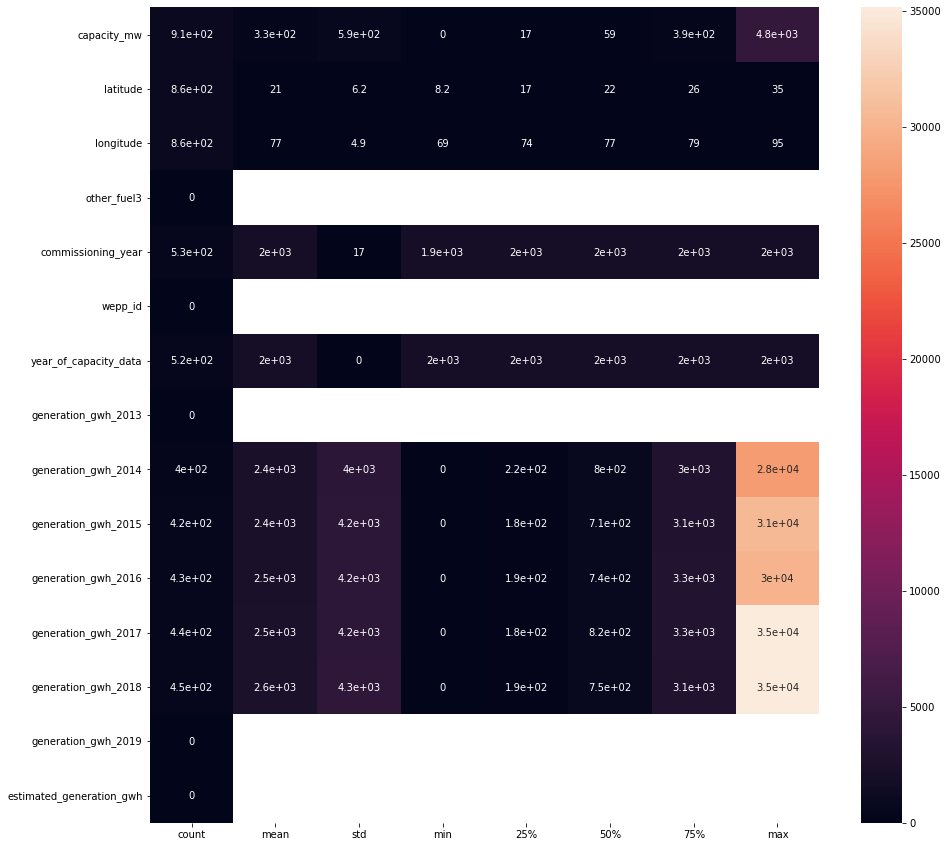

In [742]:
plt.figure(figsize=(15,15))
sns.heatmap(df.describe().T,annot=True,annot_kws={"size":10})
plt.show()

CORRELATION AMONG THE FEATURES AND OF THE FEATURE WITH THE LABEL (CAPACITY_MW)

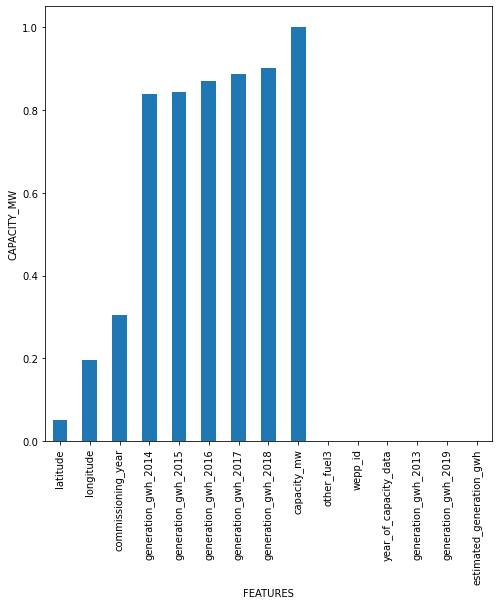

In [743]:
plt.figure(figsize=(8,8))
plt.grid(True)
df.corr()['capacity_mw'].sort_values().plot(kind='bar')
plt.xlabel("FEATURES")
plt.ylabel("CAPACITY_MW")
plt.show()

SOME OF THE FEATURES HAVE ZERO CORRRELATION WITH THE LABEL<BR>

PLOTTING THE HEATMAP FOR CORRELATION AMONG THE FEATURES

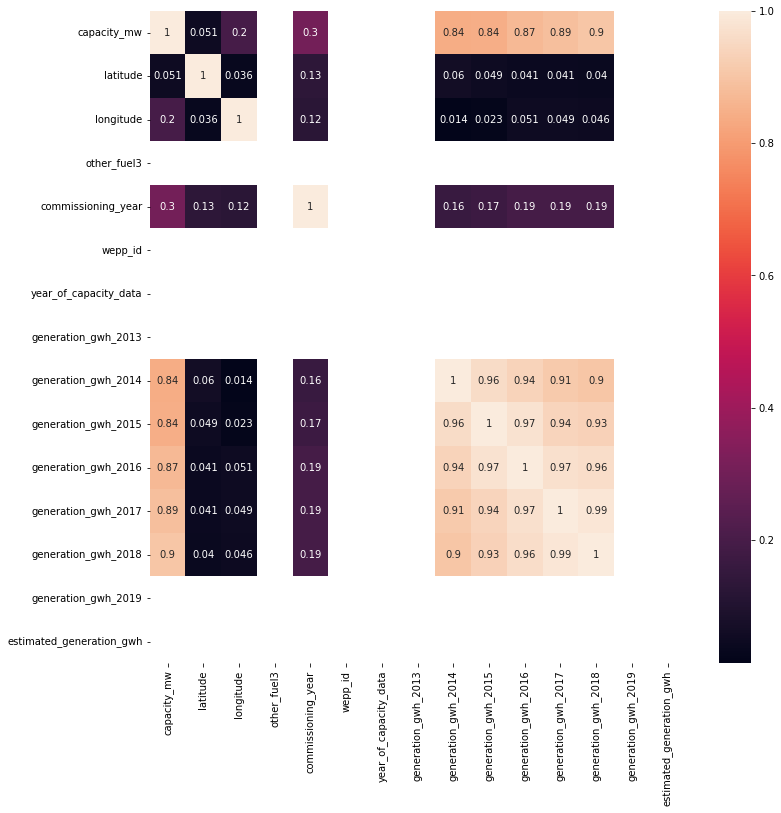

In [744]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,annot_kws={"size":10})
plt.show()

"generation_gwh_2014","generation_gwh_2015","generation_hwh_2016","generation_gwh_2017","generation_gwh_2018" have vary high value of correlation among themselves might lead to multicoliinearity problem<br>
"commisioning year have around 30% correlation with the capacity_mw"

In [745]:

def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 20)

CLEANING AND ENCODING THE DATA <BR>
-----------------------

DATA-CLEANING BASED ON SOME PRE-REQUISTE KNOWLEDGE ABOUT THE POWER PLANT DOMAIN AND SOME OBSERVATIONS FROM THE ABOVE PLOTS

In [746]:
#DROPPING 'COUNTRY' AS 'COUNTRY' AND 'COUNTRY_LONG' ARE BOTH HAVING SAME INFORMATION AND THERE IS NO POINT KEEPING BOTH OF THEM
#DROPPING NAME AS NAME OF POWER PLANT HAVE NOTHING TO DO WITH THE POWER CAPACITY AND PRIMARY FUEL PREDICTION
#DROPPING 'GPPD_IDNR' AS ITS JUST THE UNIQUE ID  NUMBER AND HOLDS NO SPECIAL IMPORTANCE WHEN IT COMES TO PREDICT THE FUEL TYPE AND POWER
#DROPPING 'OTHER_FUEL1' AND 'OTHER_FUEL2'and 'other_fuel 3' BECAUSE THEY HAVE HIGH NUMBER OF NULLS PRESENT AND KEEPING THEM WILL COMPLICATE THE PREDICTIONS<BR>
#DROPPING 'OWNER' AS IT HAVE 63% NULL VALUES 
#DROPPING SOURCE SOURCE AND URL AS THEY JUST TELLS WHERE THE DATA IS COMING FROM AND LINKS WITH HOLDING NO IMPORTANCE IN PREDICTION<BR>
#DROPPING GEOLOCATION_sOURCE AND GENERATION_DATA_sOURCE AS THEY ARE JUST THE SOURCES FROM WHICH WE ARE GETTING THE DATA AND HAVE ALMOST 50 % NULLS IN GENERATION_DATA_sOURCE 
#DROPPING "WEPP_ID" AND "YEAR_OF_CAPACITY_DATA"
#DROPPING "generation_gwh_2013","generation_gwh_2019","estimated_generation_gwh"

In [747]:
df1=df.copy()

In [748]:
df1.drop(['country','name','gppd_idnr','other_fuel1','other_fuel2','other_fuel3','owner','source','url','geolocation_source','wepp_id','year_of_capacity_data','generation_gwh_2013','generation_gwh_2019','generation_data_source','estimated_generation_gwh'],axis=1,inplace=True)

In [749]:
df1.head()

,country_long,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,India,2.5,28.1839,73.2407,Solar,2011.0,NaN,NaN,NaN,NaN,NaN
1,India,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,NaN,NaN
2,India,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,NaN,NaN
3,India,135.0,23.8712,91.3602,Gas,2004.0,617.789264,843.747,886.004428,663.774500,626.239128
4,India,1800.0,21.9603,82.4091,Coal,2015.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [750]:
#FILLING NULLS IN COMMISSIONING_YEAR  WITH ZERO AS NO OTHER SUITABLE METHOD CAN BE FOUND IN THIS COLUMN

In [751]:
df1['commissioning_year']=df1['commissioning_year'].fillna(0)

In [752]:
##SIMPLE IMPUTING LATITUDE AND LONGITUDE COLUMNS

In [753]:
from sklearn.impute import SimpleImputer

In [754]:
si=SimpleImputer()

In [755]:
df1['latitude']=si.fit_transform(df1['latitude'].values.reshape(-1,1))

In [756]:
df1['longitude']=si.fit_transform(df1['longitude'].values.reshape(-1,1))

In [757]:
#USING ORIDNAL ENCODING TECHNIQUE TO ENCODE THE PRIAMRY_FUEL COLUMN

In [758]:
from sklearn.preprocessing import OrdinalEncoder

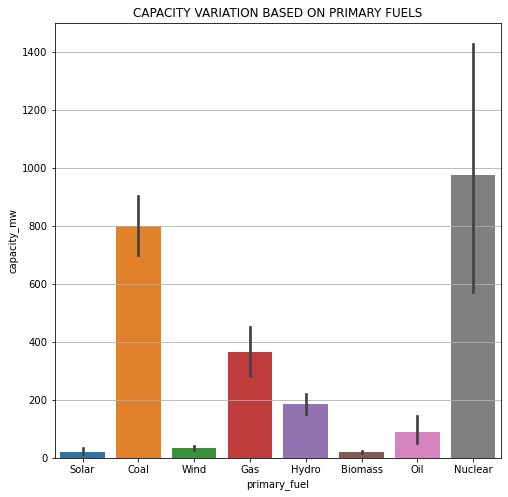

In [759]:
plt.figure(figsize=(8,8))
plt.grid(True)
sns.barplot(x=df['primary_fuel'],y=df['capacity_mw'])
plt.title("CAPACITY VARIATION BASED ON PRIMARY FUELS")
plt.show()

In [760]:
#plants in terms of increasing capacity is like this-
#Biomass<solar<wind<oil<hydro<gas<coal<nuclear

In [761]:
oe=OrdinalEncoder(categories=[['Biomass','Solar','Wind','Oil','Hydro','Gas','Coal','Nuclear']])

In [762]:
df1['primary_fuel']=oe.fit_transform(df1['primary_fuel'].values.reshape(-1,1))

In [763]:
#USING KNNImputer to impute the "generation_gwh_2014 ","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","generation_gwh_2018"

In [764]:
from sklearn.impute import KNNImputer

In [765]:
knn=KNNImputer()

In [766]:
#IMPUTING generation_gwh_2014 USING COLUMN "CAPACITY_MW" AND "PRIMARY_FUEL" AS BOTH CAPACITY AND TYPE OF PRIAMRY_FUEL HAVE A MAJOR ROLE IN GENERATION_GWH COLUMNS

In [767]:
dk=pd.DataFrame(knn.fit_transform(df1[['capacity_mw','primary_fuel','generation_gwh_2014']]),columns=['capacity_mw','primary_fuel','generation_gwh_2014'])

In [768]:
#IMPUTED COLUMN

In [769]:
dk

,capacity_mw,primary_fuel,generation_gwh_2014
0,2.5,1.0,62.225310
1,98.0,6.0,267.836380
2,39.2,2.0,95.275230
3,135.0,5.0,617.789264
4,1800.0,6.0,3035.550000
...,...,...,...
902,1600.0,6.0,4917.415700
903,3.0,1.0,62.225310
904,25.5,2.0,62.225310
905,80.0,6.0,287.829620


In [770]:
df1['generation_gwh_2014']=dk['generation_gwh_2014']

In [771]:
#SIMILARLY FOR COLUMNS "generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","generation_gwh_2018"

In [772]:
#IMPUTING "GENERATION_GWH_2015"

In [773]:
dp=pd.DataFrame(knn.fit_transform(df1[['capacity_mw','primary_fuel','generation_gwh_2015']]),columns=['capacity_mw','primary_fuel','generation_gwh_2015'])

In [774]:
dp

,capacity_mw,primary_fuel,generation_gwh_2015
0,2.5,1.0,51.425580
1,98.0,6.0,209.827620
2,39.2,2.0,110.564400
3,135.0,5.0,843.747000
4,1800.0,6.0,5916.370000
...,...,...,...
902,1600.0,6.0,0.994875
903,3.0,1.0,51.425580
904,25.5,2.0,21.410410
905,80.0,6.0,237.235860


In [775]:
df1['generation_gwh_2015']=dp['generation_gwh_2015']

In [776]:
#IMPUTING "GENERATION_GWH_2016"

In [777]:
dj=pd.DataFrame(knn.fit_transform(df1[['capacity_mw','primary_fuel','generation_gwh_2016']]),columns=['capacity_mw','primary_fuel','generation_gwh_2016'])

In [778]:
dj

,capacity_mw,primary_fuel,generation_gwh_2016
0,2.5,1.0,15.127980
1,98.0,6.0,220.799788
2,39.2,2.0,97.774670
3,135.0,5.0,886.004428
4,1800.0,6.0,6243.000000
...,...,...,...
902,1600.0,6.0,233.596650
903,3.0,1.0,15.127980
904,25.5,2.0,15.748860
905,80.0,6.0,256.471200


In [779]:
df1['generation_gwh_2016']=dj['generation_gwh_2016']

In [780]:
#IMPUTING "generation_gwh_2017"

In [781]:
dt=pd.DataFrame(knn.fit_transform(df1[['capacity_mw','primary_fuel','generation_gwh_2017']]),columns=['capacity_mw','primary_fuel','generation_gwh_2017'])

In [782]:
dt

,capacity_mw,primary_fuel,generation_gwh_2017
0,2.5,1.0,27.889850
1,98.0,6.0,254.566270
2,39.2,2.0,111.541490
3,135.0,5.0,663.774500
4,1800.0,6.0,5385.579736
...,...,...,...
902,1600.0,6.0,865.400000
903,3.0,1.0,27.889850
904,25.5,2.0,24.514810
905,80.0,6.0,298.034340


In [783]:
df1['generation_gwh_2017']=dt['generation_gwh_2017']

In [784]:
#IMPUTING "generation_gwh_2018"

In [785]:
dq=pd.DataFrame(knn.fit_transform(df1[['capacity_mw','primary_fuel','generation_gwh_2018']]),columns=['capacity_mw','primary_fuel','generation_gwh_2018'])

In [786]:
dq

,capacity_mw,primary_fuel,generation_gwh_2018
0,2.5,1.0,58.106010
1,98.0,6.0,317.251840
2,39.2,2.0,118.908470
3,135.0,5.0,626.239128
4,1800.0,6.0,7279.000000
...,...,...,...
902,1600.0,6.0,686.500000
903,3.0,1.0,73.299660
904,25.5,2.0,73.299660
905,80.0,6.0,321.345200


In [787]:
df1['generation_gwh_2018']=dq['generation_gwh_2018']

In [788]:
#ENCODING COUNTRY_LONG COLUMNS   "India"-1

In [789]:
df1['country_long']=df1['country_long'].map({'India':1})

DATA CLEANED SUCCESFULLY
-------------------

In [790]:
df1.head(n=20)

,country_long,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1,2.50,28.183900,73.240700,1.0,2011.0,62.225310,51.425580,15.127980,27.889850,58.106010
1,1,98.00,24.766300,74.609000,6.0,0.0,267.836380,209.827620,220.799788,254.566270,317.251840
2,1,39.20,21.903800,69.373200,2.0,0.0,95.275230,110.564400,97.774670,111.541490,118.908470
3,1,135.00,23.871200,91.360200,5.0,2004.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1,1800.00,21.960300,82.409100,6.0,2015.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
5,1,250.00,23.768900,68.644700,6.0,2005.0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
6,1,60.00,10.454700,77.007800,4.0,1970.0,157.558250,152.195200,61.421350,89.629600,48.327150
7,1,192.00,32.225800,77.207000,4.0,2010.0,674.391100,721.335200,675.724400,679.594950,579.318850
8,1,290.00,16.330000,75.886300,4.0,2004.0,480.594950,144.434200,402.029750,439.372100,406.377900
9,1,210.00,23.164200,81.637300,6.0,2008.0,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000


CHECKING THE NULLS AGAIN!!
------------------

In [791]:
df1.isnull().sum()

country_long           0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

ALL THE NULLS HANDLED SUCCESSFULLY!!!

ANALYSIS!!
-------------------

In [792]:
lis=df1.columns.tolist()

In [793]:
lis

['country_long',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'commissioning_year',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']

In [794]:
#COVERTING "PRIMARY_FUEL " BACK TO ORIGIANL COLUMN FOR BETTER UNDERSTANDING!!

In [795]:
df1['primary_fuel']=df['primary_fuel']

In [796]:
#CHECKING FOR THE COUNT OF DIFFERENT PRIMARY_FUELS USED 

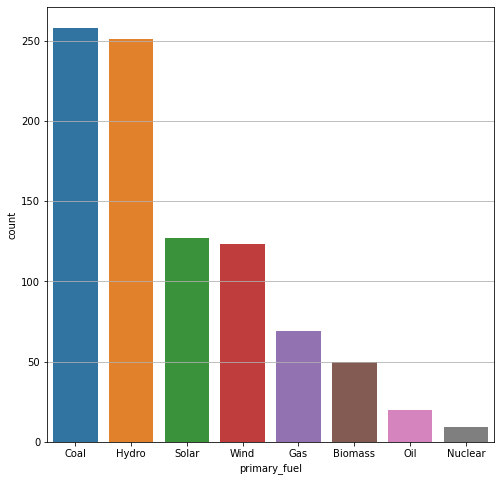

In [797]:
plt.figure(figsize=(8,8))
plt.grid(True)
sns.countplot(x=df['primary_fuel'],order=df['primary_fuel'].value_counts().index)
plt.show()

IT CAN BE CLEARLY OBSERVED THAT INDIA HAVE MOSTLY THE COAL PLANTS OPERATING WITH AROUND A COUNT OF 270<BR>
HYDRO POWER PLANTS ALSO GOOD IN  NUMBER AND STANDS SECOND IN THE LIST<BR>
NUCLEAR POWERPLANTS BEING THE LEAST AS THEY ARE MORE SOPHASTICATED AND DIRECTLY RUN BY THE CENTRAL GOVERNMENT ,SECURITY ISSUE AND DIFFERENT RISK FACTORS LIKE LEAK OF RADIATION AND HARM TO POPULATION DUE TO IT MAY BE THE REASON FOR SUCH A LOW COUNT OF NUCLEAR POWER PLANTS


In [798]:
#CHECKING THE DISTRIBUTION OF 'CAPACITY_MW'

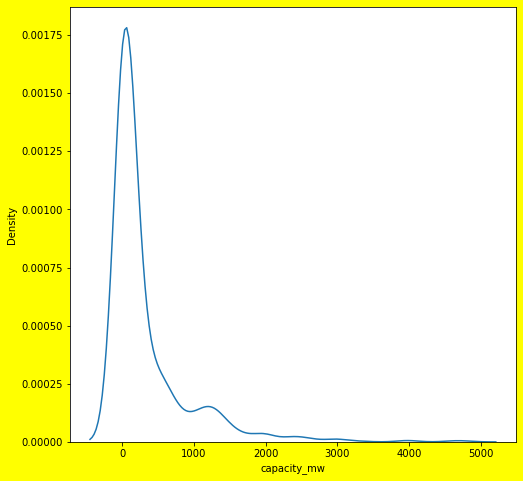

In [799]:
plt.figure(figsize=(8,8),facecolor='Yellow')
sns.kdeplot(df['capacity_mw'])
plt.show()

HIGH LEVEL OF RIGHTWARD SKEWNESS DETECTED IN THE CAPACITY_MW FEATURE<BR>
PRESENCE OF OUTLIERS<BR>
    

In [800]:
#HOW THE MEAN CAPACITY VARIES AS WE MOVE ACROSS THROUGH DIFFERENT CATEGORIES OF PRIAMRY_FUEL

In [801]:
gp=df1.groupby(['primary_fuel']).mean()

In [802]:
gp['primary_fuel']=gp.index

In [803]:
gp

,country_long,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,primary_fuel
primary_fuel,,,,,,,,,,,
Biomass,1.0,20.065200,17.460458,75.679052,0.000000,68.114094,33.670899,23.885063,33.170956,72.764286,Biomass
Coal,1.0,797.826434,21.648803,79.393349,1469.527132,3377.025808,3372.956081,3475.925467,3594.568529,3737.192561,Coal
Gas,1.0,364.818928,20.066779,78.394567,1712.565217,692.504401,726.805469,718.382865,775.412840,742.719335,Gas
Hydro,1.0,185.026972,22.182426,78.747195,1988.709163,569.210758,508.465385,501.741002,512.395016,556.354441,Hydro
Nuclear,1.0,975.555556,18.081478,76.124056,1772.666667,4542.429981,4515.611318,4769.735231,4860.822356,4867.032444,Nuclear
Oil,1.0,88.942000,17.894758,75.228471,1196.750000,135.678767,61.537122,48.693390,143.415535,74.226914,Oil
Solar,1.0,21.712598,24.004121,74.450362,126.826772,93.708888,77.881605,50.894690,61.650991,99.830416,Solar
Wind,1.0,33.429675,18.264626,74.581962,0.000000,117.713309,99.383031,81.121984,92.690620,127.907607,Wind


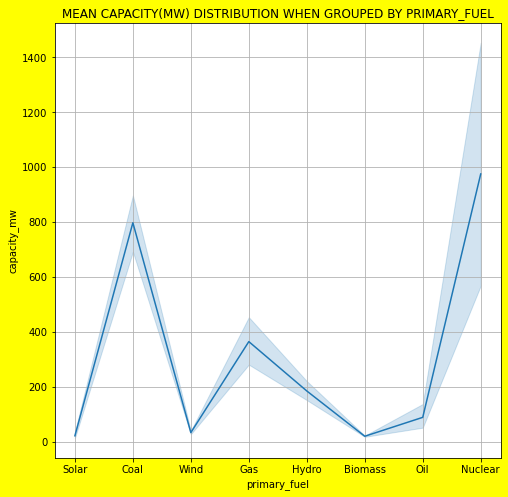

In [804]:
plt.figure(figsize=(8,8),facecolor='Yellow')
plt.grid(True)
plt.title("MEAN CAPACITY(MW) DISTRIBUTION WHEN GROUPED BY PRIMARY_FUEL")
sns.lineplot(y=df['capacity_mw'],x=df['primary_fuel'])
plt.show()

IT CAN BE OBSERVED THAT NUCLEAR POWER PLANTS HAVE THE HIGHEST CAPACITY<BR>
COAL POWER PLANTS STANDS SECOND IN TERMS OF CAPACITY<BR>
CAPACITY OF SOLAR,WIND,BIOMASS(RENEWABLE) REMAINS LOWEST

In [805]:
len(df['commissioning_year'].unique())

74

In [806]:
#distributon plot for different primary_fuels

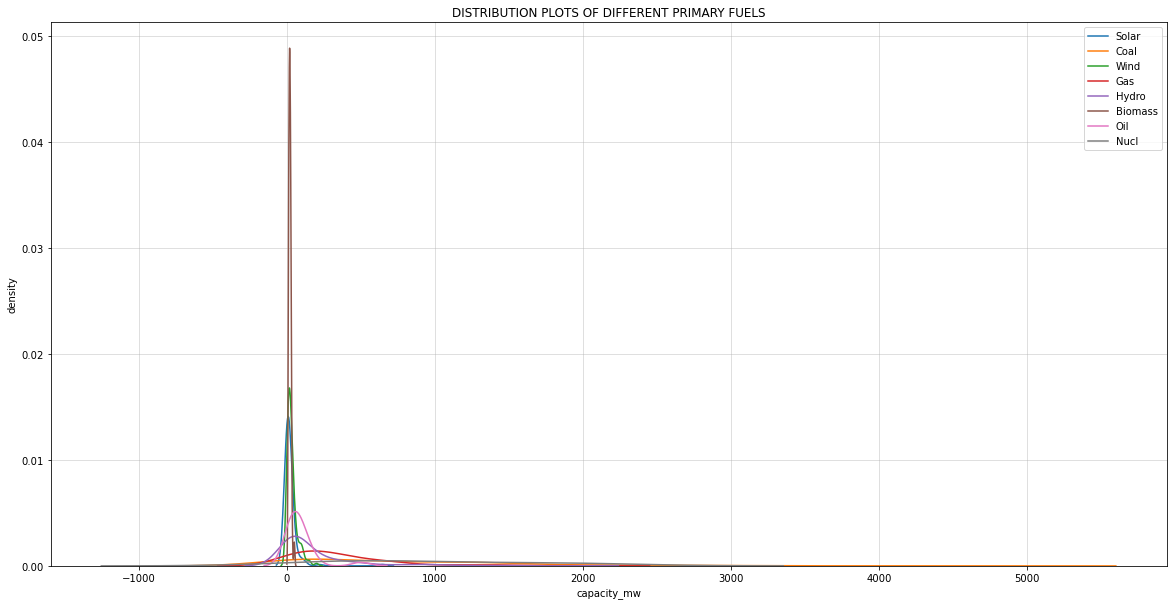

In [807]:
plt.figure(figsize=(20,10))
plt.grid(True,alpha=0.5)
plt.title("DISTRIBUTION PLOTS OF DIFFERENT PRIMARY FUELS")
sns.kdeplot(df1.loc[df['primary_fuel']=='Solar','capacity_mw'],label='Solar')
sns.kdeplot(df1.loc[df['primary_fuel']=='Coal','capacity_mw'],label='Coal')
sns.kdeplot(df1.loc[df['primary_fuel']=='Wind','capacity_mw'],label='Wind')
sns.kdeplot(df1.loc[df['primary_fuel']=='Gas','capacity_mw'],label='Gas')
sns.kdeplot(df1.loc[df['primary_fuel']=='Hydro','capacity_mw'],label='Hydro')
sns.kdeplot(df1.loc[df['primary_fuel']=='Biomass','capacity_mw'],label='Biomass')
sns.kdeplot(df1.loc[df['primary_fuel']=='Oil','capacity_mw'],label='Oil')
sns.kdeplot(df1.loc[df['primary_fuel']=='Nuclear','capacity_mw'],label='Nucl')
plt.xlabel('capacity_mw')
plt.ylabel('density')
plt.legend()
plt.show()


PRESENCE OF SKEWNESS AND OUTLIERS DETECTED<BR>
DENSITY AROUND THE MEAN IS HIGHEST IN CASE OF Biomass fuel distributionplot<br>

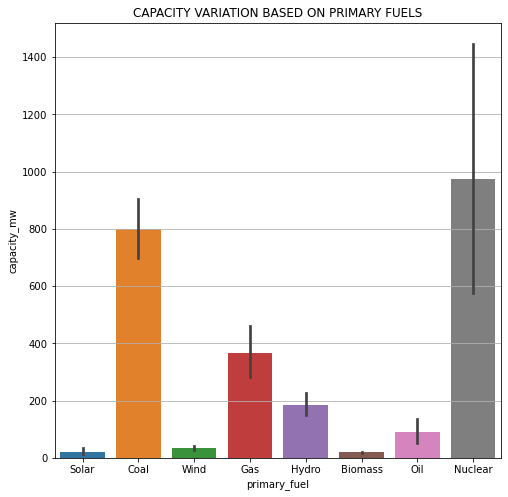

In [808]:
plt.figure(figsize=(8,8))
plt.grid(True)
sns.barplot(x=df1['primary_fuel'],y=df1['capacity_mw'])
plt.title("CAPACITY VARIATION BASED ON PRIMARY FUELS")
plt.show()

THIUGH THE COUNT OF NUCLEAR POWERPLANT CAPACITY IS LOW ITS CAPACITY IS THE HIGHEST AMONT THE ALL BECAUSE OF NUCLEAR FISSION REACTION TAKING PLACE BETWEEN THE ATOMS PRODUCING HIGH AMOUNT OF ENERGIES<BR><BR>
COAL STANDS SECOND IN TERMS OF CAPACITY<BR><br>
Biomass and Solar shares the least capacity among all<br>

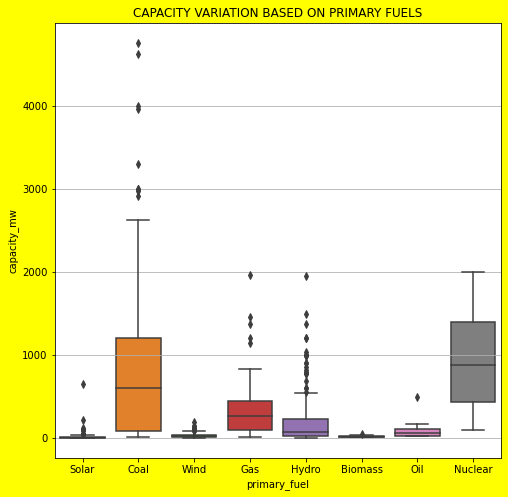

In [809]:
plt.figure(figsize=(8,8),facecolor='Yellow')
plt.grid(True)
sns.boxplot(x=df1['primary_fuel'],y=df1['capacity_mw'])
plt.title("CAPACITY VARIATION BASED ON PRIMARY FUELS")
plt.show()

Except Nuclear outliers can be seen in all the fuel categories<br>
Hydro have the highest number of outliers present<br>
oil have the least number of utliers in terms of capacity

CHECKING THE DISTRIBUTION PLOTS FOR LATITUDE AND LONGITUDE<BR>

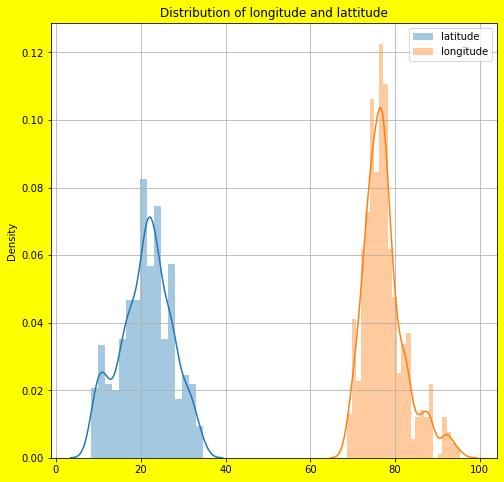

In [810]:
plt.figure(figsize=(8,8),facecolor='Yellow')
plt.grid(True)
ax=sns.distplot(x=df1['latitude'],label='latitude')
sns.distplot(x=df['longitude'],ax=ax,label='longitude')
plt.title("Distribution of longitude and lattitude")
plt.legend()
plt.show()

Latitude is having a mean of around 22 and distribution seems pretty normal<br>
Longitude is having a mean of around 77 and distribution is sligty skewed to the right<br>

CHECKING THE RELATION OF LATITUDE WITH CAPACITY

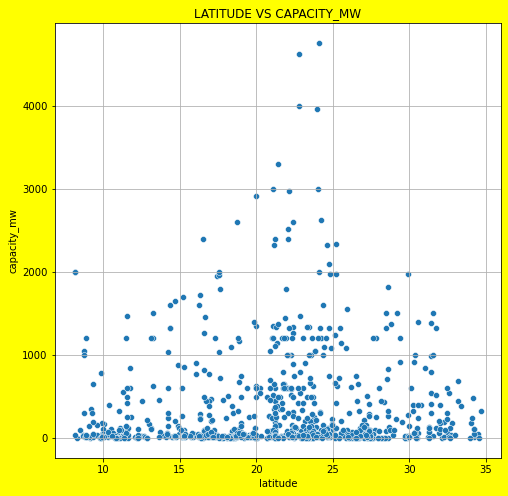

In [811]:
plt.figure(figsize=(8,8),facecolor='Yellow')
plt.grid(True)
sns.scatterplot(x=df1['latitude'],y=df1['capacity_mw'])
plt.title("LATITUDE VS CAPACITY_MW")
plt.show()

NO PATTERN VISIBLE BETWEEN THE TWO FEATURES <BR>
STRENTH OF CORRELATION IS WEAK<BR>

CHECKING THE RELATION OF LONGITUDE WITH CAPACITY

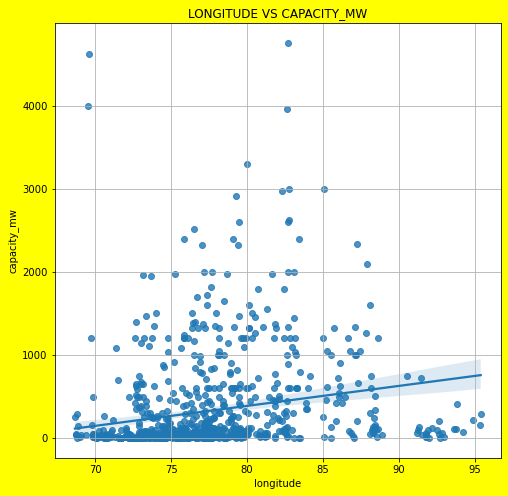

In [812]:
plt.figure(figsize=(8,8),facecolor='Yellow')
plt.grid(True)
sns.regplot(x=df1['longitude'],y=df1['capacity_mw'])
plt.title("LONGITUDE VS CAPACITY_MW")
plt.show()

SIGNIFICANT AMOUNT OF RELATIONSHIP BETWEEN THE LONGITUDE AND CAPACITY_MW FOUND<BR>
CORRELATION BETWEEN THEM IS ALSO AROUND 20%

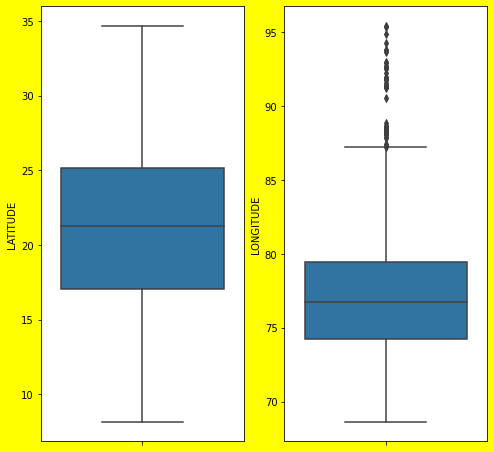

In [813]:
plt.figure(figsize=(8,8),facecolor='Yellow')
plt.subplot(1,2,1)
sns.boxplot(y=df1['latitude'])
plt.ylabel("LATITUDE")
plt.subplot(1,2,2)
sns.boxplot(y=df['longitude'])
plt.ylabel("LONGITUDE")
plt.show()

AS WE CAN SEE LONGITUDE HAVE SUBSEQUENT AMOUNT OF OUTLIERS PRESENT<BR>

In [814]:
#YEAR WISE GENERATION OF EACH PRIMARY FUEL

In [815]:
yearwise_distribution = df1.groupby(['primary_fuel'])[[ 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018']].sum().reset_index()

In [816]:
yearwise_distribution

,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,Biomass,3405.704706,1683.544975,1194.253128,1658.547789,3638.214284
1,Coal,871272.658419,870222.668836,896788.770588,927398.680361,964195.680766
2,Gas,47782.803643,50149.577328,49568.417695,53503.485990,51247.634086
3,Hydro,142871.900222,127624.811755,125936.991551,128611.148915,139644.964748
4,Nuclear,40881.869831,40640.501860,42927.617080,43747.401200,43803.292000
5,Oil,2713.575342,1230.742440,973.867798,2868.310697,1484.538280
6,Solar,11901.028735,9890.963780,6463.625642,7829.675838,12678.462844
7,Wind,14478.736970,12224.112762,9978.004054,11400.946316,15732.635630


In [817]:
yearwise_distribution_new=pd.melt(yearwise_distribution,id_vars=['primary_fuel'],value_vars=['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018'],var_name='year',value_name='cumulative_generation')

In [818]:
yearwise_distribution_new

,primary_fuel,year,cumulative_generation
0,Biomass,generation_gwh_2014,3405.704706
1,Coal,generation_gwh_2014,871272.658419
2,Gas,generation_gwh_2014,47782.803643
3,Hydro,generation_gwh_2014,142871.900222
4,Nuclear,generation_gwh_2014,40881.869831
5,Oil,generation_gwh_2014,2713.575342
6,Solar,generation_gwh_2014,11901.028735
7,Wind,generation_gwh_2014,14478.736970
8,Biomass,generation_gwh_2015,1683.544975
9,Coal,generation_gwh_2015,870222.668836


ABOVE IS THE YEARWISE CUMULATIVE DISTRIBUTION OF GENERATED POWER BY DIFFERENT PRIMARY FUELS<BR>

In [819]:
fig= px.line(yearwise_distribution_new, x='year', y='cumulative_generation', color='primary_fuel')
fig.show()

ABOVE DISTRIBUTION DEPICTS THAT THERE IS SIGNIFICANT INCREASE IN GENERATION OVER THE YEARS FOR COAL POWER PLANTS<BR>
A SLIGHT DECREASE AND THEN BACK TO GENERATION LEVEL AS IT WAS IN 2014 CAN BE SEEN IN CASE OF HYDRO<BR>
A CONSTANT KIND OF TRENDS CAN BE SEEN FOR THE REMAINING FUEL TYPES

In [820]:
lis

['country_long',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'commissioning_year',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']

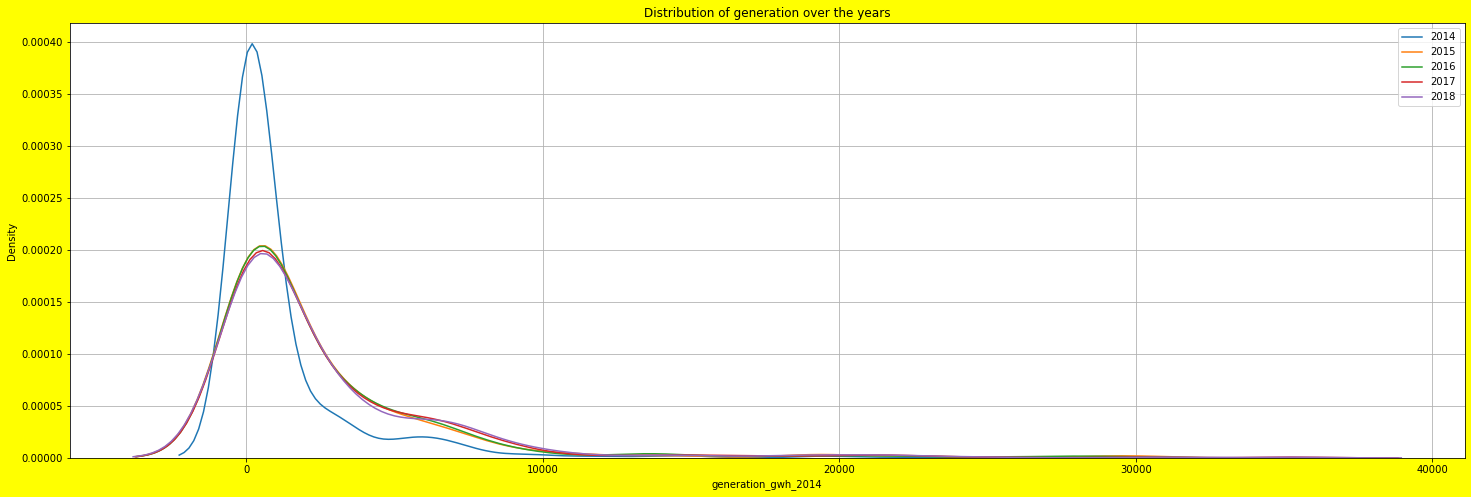

In [821]:
plt.figure(figsize=(25,8),facecolor='Yellow')
plt.grid(True)
ax=sns.kdeplot(x=df1['generation_gwh_2014'],label='2014')
sns.kdeplot(x=df['generation_gwh_2015'],ax=ax,label='2015')
sns.kdeplot(x=df['generation_gwh_2016'],ax=ax,label='2016')
sns.kdeplot(x=df['generation_gwh_2017'],ax=ax,label='2017')
sns.kdeplot(x=df['generation_gwh_2018'],ax=ax,label='2018')
plt.title("Distribution of generation over the years")
plt.legend()
plt.show()

EXCEPT 2014 THE DISTRIBUTION PLOTS ARE IDENTICAL IN TERMS OF SPREAD ABOUT THE MEAN AND STANDARD DISTRIBUTION <BR>
SPREAD AROUND THE MEAN IN CASE OF 2014 LOW DEPICTING LOW POWER GENERATIONS IN EARLY YEARS

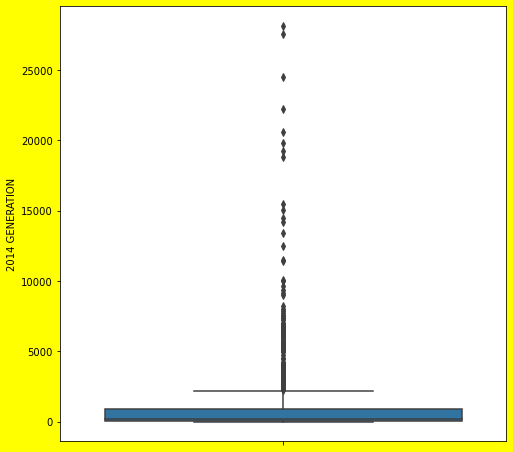

In [822]:
plt.figure(figsize=(8,8),facecolor='Yellow')
sns.boxplot(y=df1['generation_gwh_2014'])
plt.ylabel("2014 GENERATION")
plt.show()

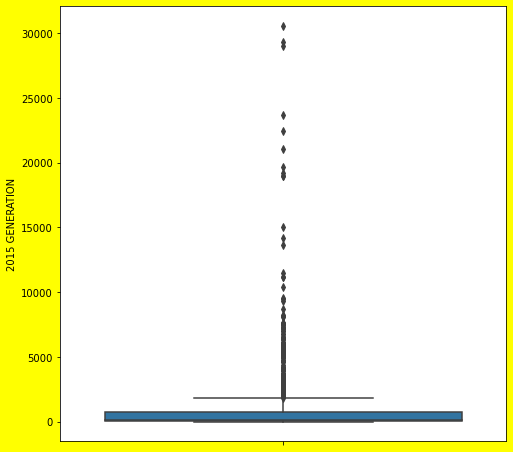

In [823]:
plt.figure(figsize=(8,8),facecolor='Yellow')
sns.boxplot(y=df1['generation_gwh_2015'])
plt.ylabel("2015 GENERATION")
plt.show()

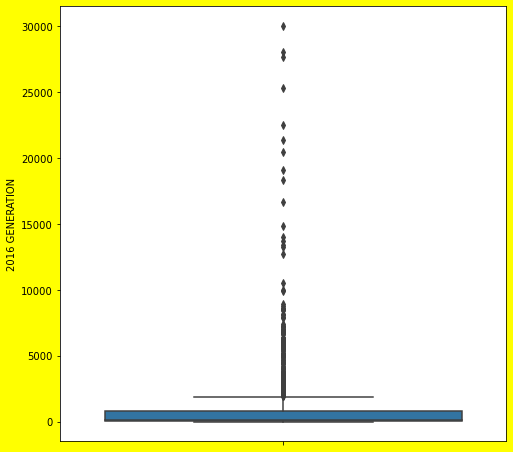

In [824]:
plt.figure(figsize=(8,8),facecolor='Yellow')
sns.boxplot(y=df1['generation_gwh_2016'])
plt.ylabel("2016 GENERATION")
plt.show()

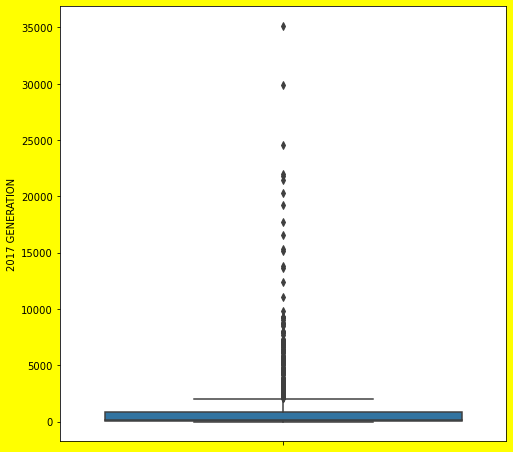

In [825]:
plt.figure(figsize=(8,8),facecolor='Yellow')
sns.boxplot(y=df1['generation_gwh_2017'])
plt.ylabel("2017 GENERATION")
plt.show()

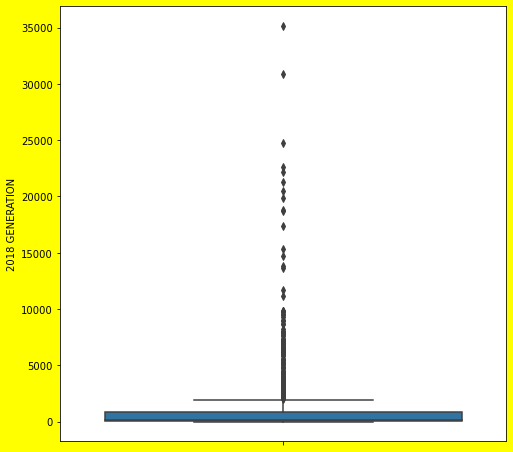

In [826]:
plt.figure(figsize=(8,8),facecolor='Yellow')
sns.boxplot(y=df1['generation_gwh_2018'])
plt.ylabel("2018 GENERATION")
plt.show()

IT CAN BE OBSERVED FROM THE ABOVE FOUR PLOTS THAT EXCESSIVE AMOUNT OF OUTLIERS PRESENT IN ALL THE YEARS FROM 2014 TO 2018

In [827]:
lis

['country_long',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'commissioning_year',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']

In [828]:
asq=df1.groupby(['commissioning_year','primary_fuel'])[['capacity_mw']].mean().reset_index()

In [829]:
asq.head(n=50)

,commissioning_year,primary_fuel,capacity_mw
0,0.0,Biomass,20.065200
1,0.0,Coal,74.872754
2,0.0,Gas,57.930000
3,0.0,Nuclear,2000.000000
4,0.0,Oil,44.962500
5,0.0,Solar,18.924370
6,0.0,Wind,33.429675
7,1927.0,Hydro,42.000000
8,1937.0,Hydro,5.000000
9,1939.0,Hydro,17.200000


In [830]:
asq.tail()

,commissioning_year,primary_fuel,capacity_mw
165,2016.0,Hydro,177.500000
166,2017.0,Coal,792.857143
167,2017.0,Hydro,199.888889
168,2018.0,Coal,895.000000
169,2018.0,Hydro,220.000000


A DATAFRAME DESCRIBING THE COMMISINONING OF VARIOUS PLANTS FROM 1927 to 2018

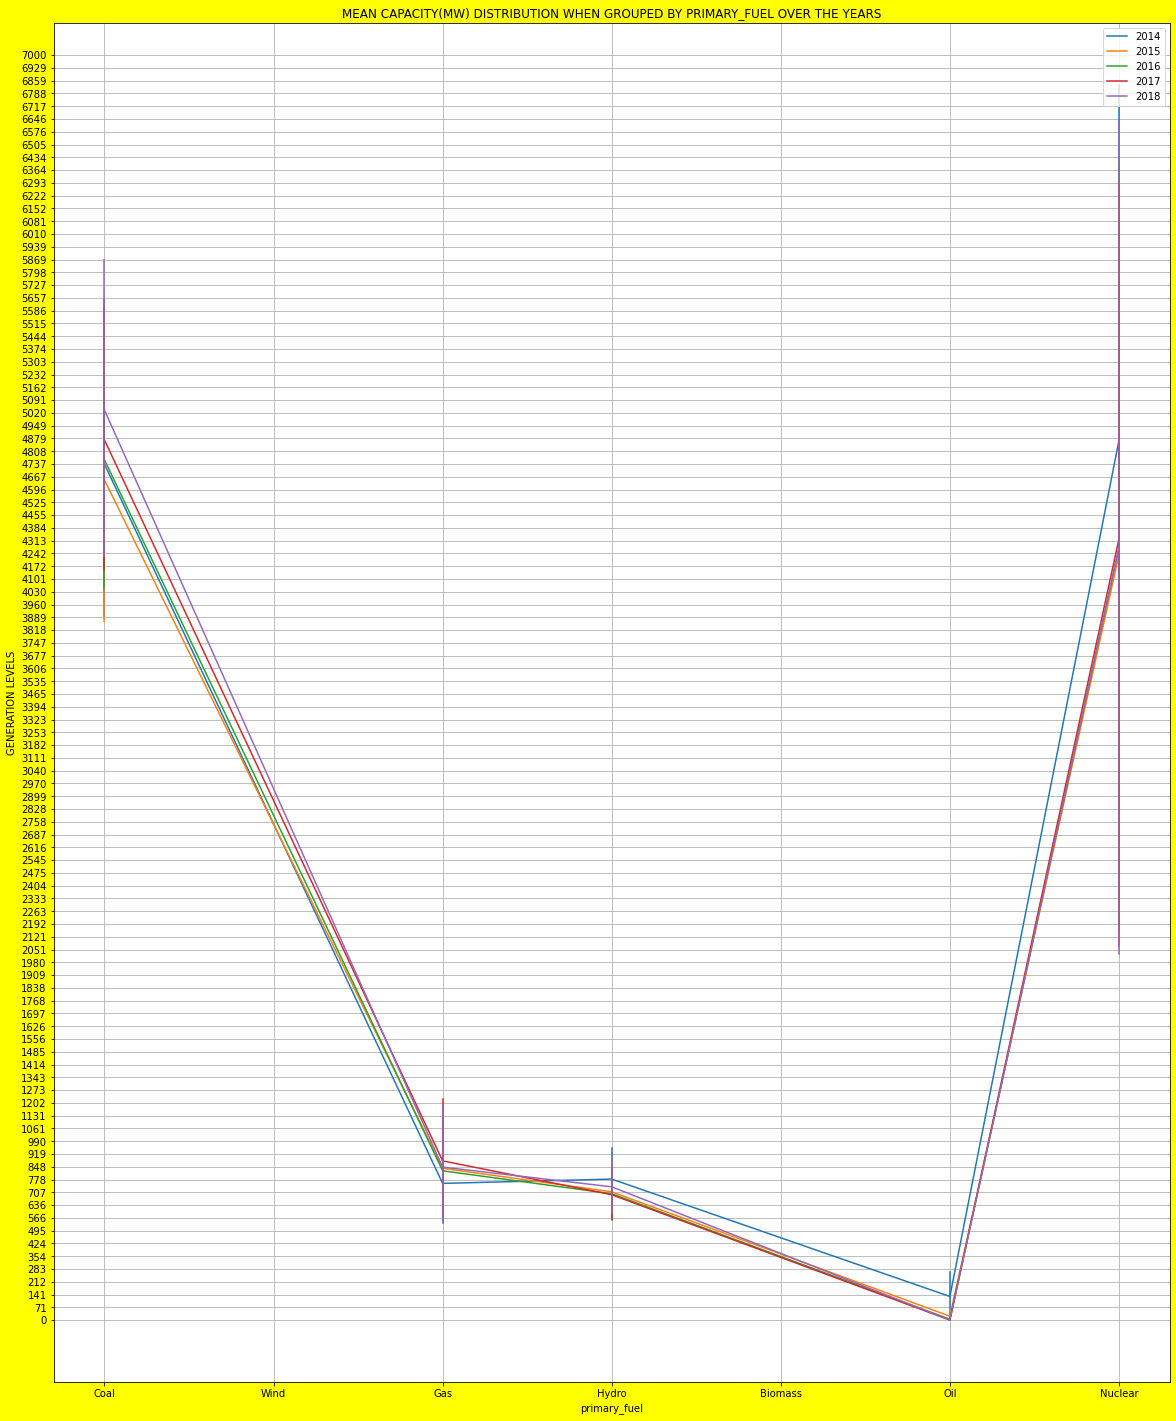

In [831]:
plt.figure(figsize=(20,25),facecolor='Yellow')
plt.grid(True)
plt.title("MEAN CAPACITY(MW) DISTRIBUTION WHEN GROUPED BY PRIMARY_FUEL OVER THE YEARS")
ax=sns.lineplot(y=df['generation_gwh_2014'],x=df['primary_fuel'],label='2014',err_style='bars')
sns.lineplot(y=df['generation_gwh_2015'],x=df['primary_fuel'],ax=ax,label='2015',err_style='bars')
sns.lineplot(y=df['generation_gwh_2016'],x=df['primary_fuel'],ax=ax,label='2016',err_style='bars')
sns.lineplot(y=df['generation_gwh_2017'],x=df['primary_fuel'],ax=ax,label='2017',err_style='bars')
sns.lineplot(y=df['generation_gwh_2018'],x=df['primary_fuel'],ax=ax,label='2018',err_style='bars')
plt.yticks(np.linspace(0,7000,100))
plt.ylabel("GENERATION LEVELS")
plt.show()

OVER THE YEARS DISTRIBUTION OF MEANS OF DIFFERENT PRIMARY FUELS CAN BE SEEN IN THE ABOVE PLOT<BR>


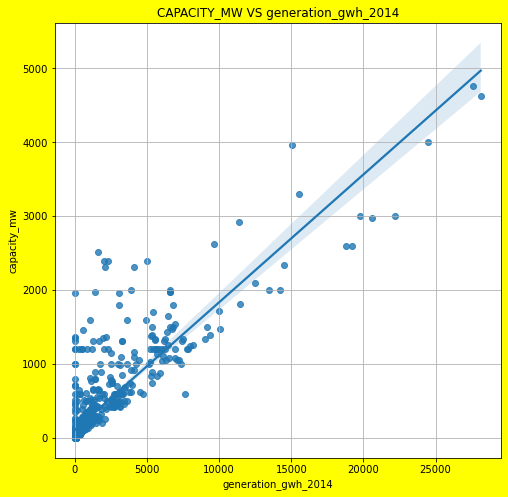

In [832]:
plt.figure(figsize=(8,8),facecolor='Yellow')
plt.grid(True)
sns.regplot(x=df1['generation_gwh_2014'],y=df1['capacity_mw'])
plt.title("CAPACITY_MW VS generation_gwh_2014")
plt.show()

A CLEAR AND STRONG RELATIONSHIP CAN BE SEEN BETWEEN THE TWO FEATURES<BR>


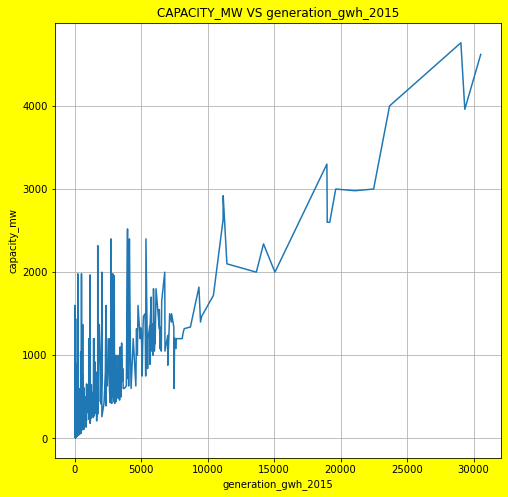

In [833]:
plt.figure(figsize=(8,8),facecolor='Yellow')
plt.grid(True)
sns.lineplot(x=df1['generation_gwh_2015'],y=df1['capacity_mw'])
plt.title("CAPACITY_MW VS generation_gwh_2015")
plt.show()

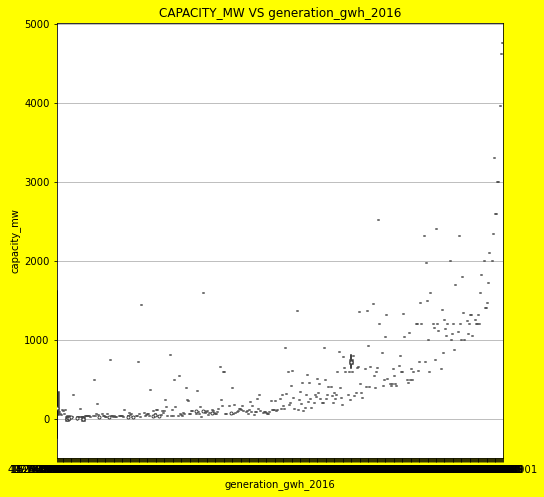

In [834]:
plt.figure(figsize=(8,8),facecolor='Yellow')
plt.grid(True)
sns.violinplot(x=df1['generation_gwh_2016'],y=df1['capacity_mw'])
plt.title("CAPACITY_MW VS generation_gwh_2016")
plt.show()

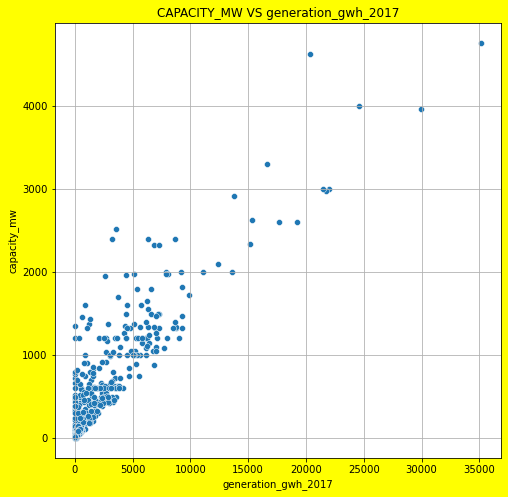

In [835]:
plt.figure(figsize=(8,8),facecolor='Yellow')
plt.grid(True)
sns.scatterplot(x=df1['generation_gwh_2017'],y=df1['capacity_mw'])
plt.title("CAPACITY_MW VS generation_gwh_2017")
plt.show()

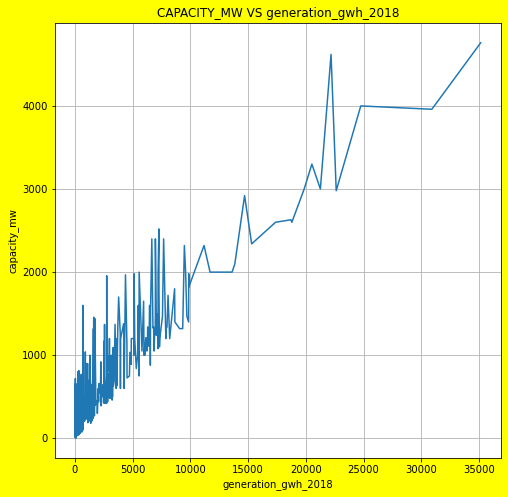

In [836]:
plt.figure(figsize=(8,8),facecolor='Yellow')
plt.grid(True)
sns.lineplot(x=df1['generation_gwh_2018'],y=df1['capacity_mw'])
plt.title("CAPACITY_MW VS generation_gwh_2018")
plt.show()

PART 1)
-------------------
CAPACITY PREDICTION
--------------------

In [469]:
#converting primary fuel column back to encoded column for the prediction purpose


In [470]:
df1['primary_fuel']=oe.fit_transform(df1['primary_fuel'].values.reshape(-1,1))

In [471]:
df1.head()

,country_long,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1,2.5,28.1839,73.2407,1.0,2011.0,62.225310,51.42558,15.127980,27.889850,58.106010
1,1,98.0,24.7663,74.6090,6.0,0.0,267.836380,209.82762,220.799788,254.566270,317.251840
2,1,39.2,21.9038,69.3732,2.0,0.0,95.275230,110.56440,97.774670,111.541490,118.908470
3,1,135.0,23.8712,91.3602,5.0,2004.0,617.789264,843.74700,886.004428,663.774500,626.239128
4,1,1800.0,21.9603,82.4091,6.0,2015.0,3035.550000,5916.37000,6243.000000,5385.579736,7279.000000


checking the skewness of the data<br>

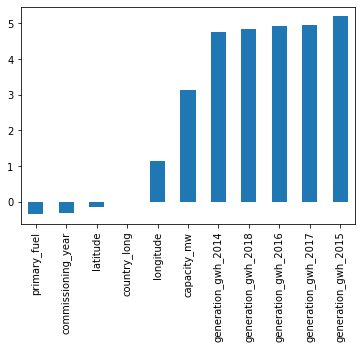

In [472]:
df1.skew().sort_values().plot(kind='bar')
plt.show()

#HIGH SKEWNESS IN ALL THE COLUMNS EXCEPT-LATITUDE,COMMIISSIONING_YEAR,PRIMARY_FUEL

In [473]:
print(df1.skew())

country_long           0.000000
capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
primary_fuel          -0.347229
commissioning_year    -0.328505
generation_gwh_2014    4.760367
generation_gwh_2015    5.195149
generation_gwh_2016    4.940227
generation_gwh_2017    4.970576
generation_gwh_2018    4.849403
dtype: float64


USING POWER TRANSFORMER TO STANDARDISE THE DATA

In [474]:
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer()

df1=pd.DataFrame(pt.fit_transform(df1),columns=df1.columns)

In [475]:
df1

,country_long,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,3.552714e-15,-1.695767,1.159436,-0.952545,-1.371245,0.852078,-0.654698,-0.524689,-0.923684,-0.777863,-0.662542
1,3.552714e-15,0.193694,0.579032,-0.544976,1.156492,-1.177638,0.082544,0.139330,0.268559,0.234976,0.161783
2,3.552714e-15,-0.292337,0.099912,-2.379864,-0.896407,-1.177638,-0.441573,-0.161551,-0.084569,-0.139552,-0.319454
3,3.552714e-15,0.360998,0.428491,2.174468,0.626051,0.850614,0.511886,0.779546,0.844681,0.661845,0.501710
4,3.552714e-15,1.649503,0.109302,1.117231,1.156492,0.852912,1.340784,1.641703,1.597564,1.560910,1.768055
...,...,...,...,...,...,...,...,...,...,...,...
902,3.552714e-15,1.593509,-0.817376,0.153591,1.156492,0.853121,1.594616,-2.175909,0.292574,0.778319,0.548015
903,3.552714e-15,-1.615576,-1.357110,0.332870,-1.371245,-1.177638,-0.654698,-0.524689,-0.923684,-0.777863,-0.552103
904,3.552714e-15,-0.522773,-0.980536,-0.280819,-0.896407,-1.177638,-0.654698,-0.941420,-0.905490,-0.837277,-0.552103
905,3.552714e-15,0.086915,0.508938,-0.796374,1.156492,-1.177638,0.119352,0.196578,0.332276,0.305824,0.168144


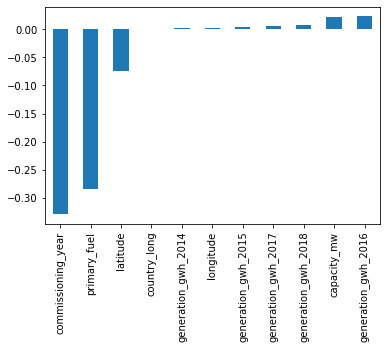

In [476]:
df1.skew().sort_values().plot(kind='bar')
plt.show()

In [477]:
print(df1.skew())

country_long           0.000000
capacity_mw            0.022164
latitude              -0.074269
longitude              0.002926
primary_fuel          -0.284692
commissioning_year    -0.329010
generation_gwh_2014    0.002726
generation_gwh_2015    0.003369
generation_gwh_2016    0.022726
generation_gwh_2017    0.005135
generation_gwh_2018    0.007145
dtype: float64


Skewness reduced succeefull!!

HANDLING OUTLIERS IN THE DATASET!!
----------------------

In [478]:
from datasist.structdata import detect_outliers

print(f'SHAPE BEFORE OUTLIER REMOVAL IS {df1.shape}')

lis=df1.columns.tolist()

outlier=detect_outliers(df1[lis],0,df1[lis].columns)

df1.drop(outlier,inplace=True)

SHAPE BEFORE OUTLIER REMOVAL IS (907, 11)


In [479]:
print(f'SHAPE AFTER OUTLIER REMOVAL IS {df1.shape}')

SHAPE AFTER OUTLIER REMOVAL IS (843, 11)


In [480]:
print(f'PERCENT LOSS AFTER OUTLIER REMOVAL IS {(907-843)/907*100}')

PERCENT LOSS AFTER OUTLIER REMOVAL IS 7.056229327453142


In [481]:
#SINCE THE LOSS IS LESS THAN 10% WE WILL CONTINUE WITH THIS OUTLIER REMOVED DATASET!!

SPLITTING THE DATASET INTO X(FEATURES ) AND Y(LABELS-("CAPACITY_MW")

In [482]:
x_scaled=df1.drop(['capacity_mw'],axis=1)

In [483]:
y=df1['capacity_mw']

CHECKING FOR MULTI COLLINEARITY ISSUE
------------------

In [485]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()

scores=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

features=x_scaled.columns.tolist()

In [488]:
vif['FEATURES']=features
vif['SCORES']=scores

vif.sort_values("SCORES",inplace=True,ascending=False)

In [490]:
vif.head(30)

,FEATURES,SCORES
8,generation_gwh_2017,13.905565
9,generation_gwh_2018,13.604168
7,generation_gwh_2016,11.276041
6,generation_gwh_2015,5.714220
5,generation_gwh_2014,4.158015
3,primary_fuel,2.172173
4,commissioning_year,1.880473
2,longitude,1.333791
0,country_long,1.089117
1,latitude,1.042666


WE CAN SEE THAT VARIANCE INFLATION FACTOR FOR FEATURES<BR>
GENERATION_GWH_2017<BR>
GENERATION_GWH_2018<BR>
GENERATION_GWH_2016<BR>
ARE GREATER THAN THE CRITICAL VALUE AND HAVE TO BE HANDLED TO REDUCE THE MULTI-COLLINEARITY PROBLEM 

In [491]:
#DROPPING "GENERATION_GWH_2017" TO CHECK IF IT CAN REDUCE THE MULTI-COLLINEARITY PROBLEM

In [ ]:
x_scaled.drop(['generation_gwh_2017'],axis=1,inplace=True)

vif=pd.DataFrame()

scores=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

features=x_scaled.columns.tolist()

In [496]:
vif['FEATURES']=features
vif['SCORES']=scores

vif.sort_values("SCORES",inplace=True,ascending=False)

vif.head(30)

AS THE VARIANCE INFLATION VALUES DECRESED AND ALL THE VALUES ARE LOWER THAN THE CRITICAL VALUE 10 WE WILL CONTINUE WITH THESE FEATURES

In [499]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

LINEAR REGRESSION
---------------

In [148]:
lr=LinearRegression()

In [149]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    lr_train_pred=lr.predict(x_train)
    lr_test_pred=lr.predict(x_test)
    lr_train_accuracy=r2_score(y_train,lr_train_pred)
    lr_test_accuracy=r2_score(y_test,lr_test_pred)
    if(round(lr_train_accuracy*100,1)==round(lr_test_accuracy*100,1)):
        print('\n\nAT RANDOM STATE--',i)
        print(f'\n\nTRAINING ACCURACY IS -{round((lr_train_accuracy)*100,2)}--AND TESTING ACCURACY IS {round((lr_test_accuracy)*100,2)}')
        



AT RANDOM STATE-- 58


TRAINING ACCURACY IS -85.3--AND TESTING ACCURACY IS 85.32


AT RANDOM STATE-- 212


TRAINING ACCURACY IS -85.17--AND TESTING ACCURACY IS 85.16


AT RANDOM STATE-- 227


TRAINING ACCURACY IS -85.21--AND TESTING ACCURACY IS 85.25


AT RANDOM STATE-- 291


TRAINING ACCURACY IS -85.19--AND TESTING ACCURACY IS 85.23


AT RANDOM STATE-- 301


TRAINING ACCURACY IS -85.05--AND TESTING ACCURACY IS 85.1


AT RANDOM STATE-- 314


TRAINING ACCURACY IS -85.15--AND TESTING ACCURACY IS 85.09


AT RANDOM STATE-- 346


TRAINING ACCURACY IS -85.2--AND TESTING ACCURACY IS 85.25


AT RANDOM STATE-- 399


TRAINING ACCURACY IS -85.15--AND TESTING ACCURACY IS 85.24


AT RANDOM STATE-- 553


TRAINING ACCURACY IS -85.15--AND TESTING ACCURACY IS 85.24


AT RANDOM STATE-- 605


TRAINING ACCURACY IS -85.2--AND TESTING ACCURACY IS 85.25


AT RANDOM STATE-- 632


TRAINING ACCURACY IS -85.14--AND TESTING ACCURACY IS 85.09


AT RANDOM STATE-- 650


TRAINING ACCURACY IS -85.2--AND TESTING ACCU

WE WILL SELECT RANDOM STATE  AS -212

In [150]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=212)

CHECKING THE CROSS VALIDATION SCORES <BR>

In [151]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cross_val=cross_val_score(lr,x_scaled,y,cv=i).mean()
    print(f"\n\nCROSS VAL IS AT CV = {i} is {round(cross_val*100,2)}")
    



CROSS VAL IS AT CV = 2 is 84.19


CROSS VAL IS AT CV = 3 is 84.21


CROSS VAL IS AT CV = 4 is 84.4


CROSS VAL IS AT CV = 5 is 84.31


CROSS VAL IS AT CV = 6 is 84.4


CROSS VAL IS AT CV = 7 is 83.64


CROSS VAL IS AT CV = 8 is 84.34


CROSS VAL IS AT CV = 9 is 84.11


WE WILL SELECT CV AS 5 AS ITS GIVING MOST APPROPRIATE SCORES AND THAT SCORE IS CLOSE TO TESTING SCORE

In [152]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
def score(mod,x_train,x_test,y_train,y_test,train):
    n=x_train.shape[0]
    p=9
    if (train==True):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_train)
        accuracy=r2_score(y_train,y_pred)
        mse=mean_squared_error(y_train,y_pred)
        mae=mean_absolute_error(y_train,y_pred)
        rsme=np.sqrt(mse)
        print(f"\n\nTraining SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\nmean sqaured error is --',mse)
        print('\nmean sqaured error is --',mse)
        print('\nroot mean sqaured error is --',rsme)
        print('\nmean aboslute error is --',mae)
        print('\ndifference between rmse and mae is ',rsme-mae)
    elif(train==False):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_test)
        accuracy=r2_score(y_test,y_pred)
        cross_val=cross_val_score(mod,x_scaled,y,cv=5).mean()
        ad_r=1-(1-accuracy)*(n-1)/(n-p-1)
        mse=mean_squared_error(y_test,y_pred)
        mae=mean_absolute_error(y_test,y_pred)
        rsme=np.sqrt(mse)
        print(f"\n\nTesting SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\n\nCROSS VAL SCORE IS --',round(cross_val*100,2))
        print(f"\nadjusted r2_score for {mod} is {round(ad_r*100,2)}")
        print('\nmean sqaured error is --',mse)
        print('\nmean aboslute error is -',mae)
        print('\nroot mean sqaured error is --',rsme)
        print('\nmean aboslute error is --',mae)
        print('\ndifference between rmse and mae is ',rsme-mae)

In [153]:
score(lr,x_train,x_test,y_train,y_test,train=True)
print('\n\n-----------------------\n\n')
score(lr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE LinearRegression() is 85.29

mean sqaured error is -- 0.15149442736205293

mean sqaured error is -- 0.15149442736205293

root mean sqaured error is -- 0.3892228505137551

mean aboslute error is -- 0.2895906466717135

difference between rmse and mae is  0.09963220384204158


-----------------------




Testing SCORE FOR THE LinearRegression() is 84.87


CROSS VAL SCORE IS -- 84.31

adjusted r2_score for LinearRegression() is 84.67

mean sqaured error is -- 0.14954555112788387

mean aboslute error is - 0.279449976809673

root mean sqaured error is -- 0.3867111986067689

mean aboslute error is -- 0.279449976809673

difference between rmse and mae is  0.10726122179709591


TRAINING AND TESTING SCORES ARE PRETTY HIGH AND CLOSE TO EACH OTHER <BR>
CROSS VAL SCORE IS ALSO CLOSE TO TESTING SCORE<BR>
ROOT MEAN SQUARED ERROR IS -{0.3867111986067689}<BR>
DIFFERENCE BETWEEN THE ROOT MEAN SQUARED ERROR AND MEAN ABSOLUTE ERROR IS -{0.10726122179709591} depicting the low spread and good fit with the predicting line<BR>

CHECKING IF OUR LINEAR REGRESSION MODEL OVERFIT USING LASSO<br>
---------------

LASSO LINEAR REGRESSION
------------------------------

In [154]:
from sklearn.linear_model import Lasso,LassoCV

In [155]:
lasscv=LassoCV(alphas=None,max_iter=100,normalize=True)

In [156]:
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [157]:
alpha=lasscv.alpha_

In [158]:
lass_reg=Lasso(alpha)

In [159]:
lass_reg.fit(x_train,y_train)

Lasso(alpha=6.996109879381996e-05)

In [160]:
score(lass_reg,x_train,x_test,y_train,y_test,train=True)
score(lass_reg,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE Lasso(alpha=6.996109879381996e-05) is 85.29

mean sqaured error is -- 0.15149458820629977

mean sqaured error is -- 0.15149458820629977

root mean sqaured error is -- 0.3892230571360075

mean aboslute error is -- 0.2895920926137716

difference between rmse and mae is  0.09963096452223591


Testing SCORE FOR THE Lasso(alpha=6.996109879381996e-05) is 84.87


CROSS VAL SCORE IS -- 84.31

adjusted r2_score for Lasso(alpha=6.996109879381996e-05) is 84.67

mean sqaured error is -- 0.1495621855680678

mean aboslute error is - 0.2794648194989552

root mean sqaured error is -- 0.3867327055836729

mean aboslute error is -- 0.2794648194989552

difference between rmse and mae is  0.10726788608471771


SINCE THE LASSO SCORES ARE ALMOST SAME AS OUR LINEAR REGRESSION TESTING SCORES WE CAN BE ASSURED THAT OUR MODEL IS NOT OVERFITTING!!!

MODEL 2)-DECISION TREE
----------------------

In [161]:
from sklearn.tree import DecisionTreeRegressor

In [162]:
dt=DecisionTreeRegressor()

In [163]:
score(dt,x_train,x_test,y_train,y_test,train=True)
print('\n\n-----------------------\n\n')
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeRegressor() is 100.0

mean sqaured error is -- 3.942754352189091e-05

mean sqaured error is -- 3.942754352189091e-05

root mean sqaured error is -- 0.0062791355712304

mean aboslute error is -- 0.00043413676062236024

difference between rmse and mae is  0.00584499881060804


-----------------------




Testing SCORE FOR THE DecisionTreeRegressor() is 90.47


CROSS VAL SCORE IS -- 88.09

adjusted r2_score for DecisionTreeRegressor() is 90.34

mean sqaured error is -- 0.09421557251473268

mean aboslute error is - 0.1912326449320626

root mean sqaured error is -- 0.30694555301345006

mean aboslute error is -- 0.1912326449320626

difference between rmse and mae is  0.11571290808138746


#### HYPERPARAMETER TUNING THE PARAMETERS:

In [164]:
dt=DecisionTreeRegressor()

In [165]:
ppo={'criterion':["squared_error", "friedman_mse", "absolute_error"],
      'min_samples_split':[2,3],
    'min_samples_leaf':[5,6],
    'random_state':[404,350,472],
    'max_depth':[20,25,30]}

In [166]:
from sklearn.model_selection import GridSearchCV

In [167]:
lgt=GridSearchCV(dt,param_grid=ppo)

In [168]:
lgt.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [20, 25, 30], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [2, 3],
                         'random_state': [404, 350, 472]})

In [169]:
lgt.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 20,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'random_state': 472}

In [170]:
dt=lgt.best_estimator_

In [171]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeRegressor(criterion='friedman_mse', max_depth=20,
                      min_samples_leaf=5, random_state=472) is 96.67

mean sqaured error is -- 0.03431787802398137

mean sqaured error is -- 0.03431787802398137

root mean sqaured error is -- 0.18525085161472638

mean aboslute error is -- 0.12283322775962131

difference between rmse and mae is  0.06241762385510506


Testing SCORE FOR THE DecisionTreeRegressor(criterion='friedman_mse', max_depth=20,
                      min_samples_leaf=5, random_state=472) is 91.71


CROSS VAL SCORE IS -- 91.76

adjusted r2_score for DecisionTreeRegressor(criterion='friedman_mse', max_depth=20,
                      min_samples_leaf=5, random_state=472) is 91.59

mean sqaured error is -- 0.08200931696208161

mean aboslute error is - 0.20567234762514575

root mean sqaured error is -- 0.2863726889249071

mean aboslute error is -- 0.20567234762514575

difference between rmse and mae is  0.08070034129976134


IT CAN BE OBSERVED THAT THERE IS INCRESE IN THE TESTING SCORE ACCURACY AND THE CROSS VAL SCORES FURTHER THE DIFFERENCE BETWEEN THE ROOT MEAN SQUARED ERROR AND MEAN ABSOLUTE ERROR HAV DECREASED!!

#### MORE HYPERPARAMETER TUNING THE PARAMETERS:

In [172]:
dk=DecisionTreeRegressor()

In [173]:
pp={'criterion':["squared_error", "friedman_mse", "absolute_error"],
      'splitter':["best", "random"],
      'min_samples_split':np.arange(3,5),
    'min_samples_leaf':np.arange(4,8),
    'random_state':[404,350,234,210,198],
    'max_depth':np.arange(20,25)}

In [174]:
lgp=GridSearchCV(dk,param_grid=pp)

In [175]:
lgp.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': array([20, 21, 22, 23, 24]),
                         'min_samples_leaf': array([4, 5, 6, 7]),
                         'min_samples_split': array([3, 4]),
                         'random_state': [404, 350, 234, 210, 198],
                         'splitter': ['best', 'random']})

In [176]:
dk=lgp.best_estimator_

In [177]:
score(dk,x_train,x_test,y_train,y_test,train=True)
score(dk,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeRegressor(criterion='friedman_mse', max_depth=20,
                      min_samples_leaf=5, min_samples_split=3,
                      random_state=210) is 96.67

mean sqaured error is -- 0.03431787802398137

mean sqaured error is -- 0.03431787802398137

root mean sqaured error is -- 0.18525085161472638

mean aboslute error is -- 0.12283322775962133

difference between rmse and mae is  0.06241762385510505


Testing SCORE FOR THE DecisionTreeRegressor(criterion='friedman_mse', max_depth=20,
                      min_samples_leaf=5, min_samples_split=3,
                      random_state=210) is 91.7


CROSS VAL SCORE IS -- 91.76

adjusted r2_score for DecisionTreeRegressor(criterion='friedman_mse', max_depth=20,
                      min_samples_leaf=5, min_samples_split=3,
                      random_state=210) is 91.59

mean sqaured error is -- 0.08207618612096403

mean aboslute error is - 0.20646241610726673

root mean sqaured error is -- 0.28648

SINCE THE ACCURACIES AND THE DIFFERENCE IS ALMOST SAME WE WILL CONTINUE WITH THE PREVIOUS PARAMETERS ONLY!!

MODEL 3) KNN 
---------------------------------

In [178]:
from sklearn.neighbors import KNeighborsRegressor

In [179]:
knr=KNeighborsRegressor()

In [180]:
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [181]:
score(knr,x_train,x_test,y_train,y_test,train=True)
score(knr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsRegressor() is 93.24

mean sqaured error is -- 0.06965135945288216

mean sqaured error is -- 0.06965135945288216

root mean sqaured error is -- 0.26391543996682376

mean aboslute error is -- 0.19376860050520894

difference between rmse and mae is  0.07014683946161482


Testing SCORE FOR THE KNeighborsRegressor() is 91.82


CROSS VAL SCORE IS -- 89.53

adjusted r2_score for KNeighborsRegressor() is 91.71

mean sqaured error is -- 0.0808484977298565

mean aboslute error is - 0.2069232051494647

root mean sqaured error is -- 0.2843387024832471

mean aboslute error is -- 0.2069232051494647

difference between rmse and mae is  0.07741549733378242


HYPERPARAMETER TUNING THE PARAMETERS-
------------------

In [182]:
knr.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [183]:
pl={"n_neighbors":np.arange(3,6),
   "weights":['uniform', 'distance'],
   "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':np.arange(25,35)}

In [184]:
kgs=GridSearchCV(knr,param_grid=pl)

In [185]:
kgs.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34]),
                         'n_neighbors': array([3, 4, 5]),
                         'weights': ['uniform', 'distance']})

In [186]:
kgs.best_params_

{'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 3, 'weights': 'distance'}

In [187]:
knr=kgs.best_estimator_

In [188]:
knr.fit(x_train,y_train)

KNeighborsRegressor(leaf_size=25, n_neighbors=3, weights='distance')

In [189]:
score(knr,x_train,x_test,y_train,y_test,train=True)
print('\n\n-----------------------\n\n')
score(knr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsRegressor(leaf_size=25, n_neighbors=3, weights='distance') is 100.0

mean sqaured error is -- 3.942754352189091e-05

mean sqaured error is -- 3.942754352189091e-05

root mean sqaured error is -- 0.0062791355712304

mean aboslute error is -- 0.0004341367606223548

difference between rmse and mae is  0.005844998810608045


-----------------------




Testing SCORE FOR THE KNeighborsRegressor(leaf_size=25, n_neighbors=3, weights='distance') is 92.67


CROSS VAL SCORE IS -- 89.44

adjusted r2_score for KNeighborsRegressor(leaf_size=25, n_neighbors=3, weights='distance') is 92.57

mean sqaured error is -- 0.07248576633893945

mean aboslute error is - 0.18739710977846374

root mean sqaured error is -- 0.269231807814269

mean aboslute error is -- 0.18739710977846374

difference between rmse and mae is  0.08183469803580523


AGAIN TUNING THE PARAMETERS------------------------

In [190]:
knr=KNeighborsRegressor()

In [191]:
pu={"n_neighbors":np.arange(2,5),
   "weights":['uniform', 'distance'],
   "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':np.arange(40,50)}

In [192]:
kgsv=GridSearchCV(knr,param_grid=pu)

In [193]:
kgsv.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'n_neighbors': array([2, 3, 4]),
                         'weights': ['uniform', 'distance']})

In [194]:
kgsv.best_params_

{'algorithm': 'auto', 'leaf_size': 40, 'n_neighbors': 3, 'weights': 'distance'}

In [195]:
knr=kgsv.best_estimator_

In [196]:
knr.fit(x_train,y_train)

KNeighborsRegressor(leaf_size=40, n_neighbors=3, weights='distance')

In [197]:
score(knr,x_train,x_test,y_train,y_test,train=True)
print('\n\n-----------------------\n\n')
score(knr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsRegressor(leaf_size=40, n_neighbors=3, weights='distance') is 100.0

mean sqaured error is -- 3.942754352189091e-05

mean sqaured error is -- 3.942754352189091e-05

root mean sqaured error is -- 0.0062791355712304

mean aboslute error is -- 0.0004341367606223548

difference between rmse and mae is  0.005844998810608045


-----------------------




Testing SCORE FOR THE KNeighborsRegressor(leaf_size=40, n_neighbors=3, weights='distance') is 92.67


CROSS VAL SCORE IS -- 89.44

adjusted r2_score for KNeighborsRegressor(leaf_size=40, n_neighbors=3, weights='distance') is 92.57

mean sqaured error is -- 0.07248576633893945

mean aboslute error is - 0.18739710977846374

root mean sqaured error is -- 0.269231807814269

mean aboslute error is -- 0.18739710977846374

difference between rmse and mae is  0.08183469803580523


SINCE THE DIFFERENCE BETWEEN THE TRAINING AND TESTING SCORES IS LOW IN CASE OF DEFAULT PARAMETERS WE WILL CONTINUW WITH THE AS THE FINAL

In [198]:
knr=KNeighborsRegressor()

In [199]:
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [200]:
score(knr,x_train,x_test,y_train,y_test,train=True)
print('\n\n-----------------------\n\n')
score(knr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsRegressor() is 93.24

mean sqaured error is -- 0.06965135945288216

mean sqaured error is -- 0.06965135945288216

root mean sqaured error is -- 0.26391543996682376

mean aboslute error is -- 0.19376860050520894

difference between rmse and mae is  0.07014683946161482


-----------------------




Testing SCORE FOR THE KNeighborsRegressor() is 91.82


CROSS VAL SCORE IS -- 89.53

adjusted r2_score for KNeighborsRegressor() is 91.71

mean sqaured error is -- 0.0808484977298565

mean aboslute error is - 0.2069232051494647

root mean sqaured error is -- 0.2843387024832471

mean aboslute error is -- 0.2069232051494647

difference between rmse and mae is  0.07741549733378242


MODEL 4)-RANDOM FOREST REGRESSOR
------------------

In [201]:
from sklearn.ensemble import RandomForestRegressor

In [202]:
rfr=RandomForestRegressor()

In [203]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [204]:
score(rfr,x_train,x_test,y_train,y_test,train=True)
score(rfr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestRegressor() is 99.15

mean sqaured error is -- 0.008721181802684825

mean sqaured error is -- 0.008721181802684825

root mean sqaured error is -- 0.09338726788318001

mean aboslute error is -- 0.06439596057122883

difference between rmse and mae is  0.02899130731195118


Testing SCORE FOR THE RandomForestRegressor() is 93.96


CROSS VAL SCORE IS -- 93.12

adjusted r2_score for RandomForestRegressor() is 93.88

mean sqaured error is -- 0.059720333852797375

mean aboslute error is - 0.15848092791137336

root mean sqaured error is -- 0.24437744137460268

mean aboslute error is -- 0.15848092791137336

difference between rmse and mae is  0.08589651346322932


HYPERPARAMETER TUNING

In [205]:
rfr=RandomForestRegressor()

In [206]:
par={"n_estimators":[60,72,82],
     "criterion":["squared_error", "absolute_error", "poisson"],
     "max_depth":[25,28,30],
     "min_samples_split":[2,3,5]}

In [207]:
rgs=GridSearchCV(rfr,param_grid=par)

In [208]:
rgs.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [25, 28, 30],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [60, 72, 82]})

In [209]:
rgs.best_params_

{'criterion': 'absolute_error',
 'max_depth': 30,
 'min_samples_split': 5,
 'n_estimators': 82}

In [210]:
rfr=rgs.best_estimator_

In [211]:
score(rfr,x_train,x_test,y_train,y_test,train=True)
score(rfr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestRegressor(criterion='absolute_error', max_depth=30,
                      min_samples_split=5, n_estimators=82) is 98.69

mean sqaured error is -- 0.013477740642991993

mean sqaured error is -- 0.013477740642991993

root mean sqaured error is -- 0.11609367184731471

mean aboslute error is -- 0.07979321614059992

difference between rmse and mae is  0.03630045570671479


Testing SCORE FOR THE RandomForestRegressor(criterion='absolute_error', max_depth=30,
                      min_samples_split=5, n_estimators=82) is 94.33


CROSS VAL SCORE IS -- 93.51

adjusted r2_score for RandomForestRegressor(criterion='absolute_error', max_depth=30,
                      min_samples_split=5, n_estimators=82) is 94.26

mean sqaured error is -- 0.05601527943558472

mean aboslute error is - 0.1595312401743743

root mean sqaured error is -- 0.23667547282214252

mean aboslute error is -- 0.1595312401743743

difference between rmse and mae is  0.07714423264776821


QUIET SIGNIFICANT INCREASE IN THE TESTING AND TRAINING SCORES!!<BR>

MODEL 5)  ADA BOOST REGRESSOR
-----------------------

In [212]:
from sklearn.ensemble import AdaBoostRegressor

In [213]:
adr=AdaBoostRegressor()

In [214]:
adr.fit(x_train,y_train)

AdaBoostRegressor()

In [215]:
score(adr,x_train,x_test,y_train,y_test,train=True)
score(adr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostRegressor() is 93.39

mean sqaured error is -- 0.06810113633097474

mean sqaured error is -- 0.06810113633097474

root mean sqaured error is -- 0.26096194421979374

mean aboslute error is -- 0.2211697421315827

difference between rmse and mae is  0.03979220208821105


Testing SCORE FOR THE AdaBoostRegressor() is 91.32


CROSS VAL SCORE IS -- 91.2

adjusted r2_score for AdaBoostRegressor() is 91.2

mean sqaured error is -- 0.08583877169178429

mean aboslute error is - 0.21788218348957814

root mean sqaured error is -- 0.292982545029195

mean aboslute error is -- 0.21788218348957814

difference between rmse and mae is  0.07510036153961688


HYPERPARAMETER TUNING----------------
----------------------

In [216]:
adr.get_params().keys()

dict_keys(['base_estimator', 'learning_rate', 'loss', 'n_estimators', 'random_state'])

In [217]:
para={
     'n_estimators':[48,52,60,72],
     'learning_rate':[0.001,0.025,0.03],
     'random_state':[232,345,678]}


In [218]:
ags=GridSearchCV(adr,param_grid=para)

In [219]:
ags.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.025, 0.03],
                         'n_estimators': [48, 52, 60, 72],
                         'random_state': [232, 345, 678]})

In [220]:
ags.best_params_

{'learning_rate': 0.03, 'n_estimators': 72, 'random_state': 678}

In [221]:
adr=ags.best_estimator_

In [222]:
score(adr,x_train,x_test,y_train,y_test,train=True)
score(adr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostRegressor(learning_rate=0.03, n_estimators=72, random_state=678) is 91.81

mean sqaured error is -- 0.08431130937141829

mean sqaured error is -- 0.08431130937141829

root mean sqaured error is -- 0.29036409793812024

mean aboslute error is -- 0.21750642908842094

difference between rmse and mae is  0.0728576688496993


Testing SCORE FOR THE AdaBoostRegressor(learning_rate=0.03, n_estimators=72, random_state=678) is 89.7


CROSS VAL SCORE IS -- 90.36

adjusted r2_score for AdaBoostRegressor(learning_rate=0.03, n_estimators=72, random_state=678) is 89.56

mean sqaured error is -- 0.1017987730484921

mean aboslute error is - 0.21955429558926923

root mean sqaured error is -- 0.3190591999120102

mean aboslute error is -- 0.21955429558926923

difference between rmse and mae is  0.09950490432274098


CONCLUSION-
-----------------
SINCE ***RANDOM FOREST REGRESSOR*** GAVE QUIET CLOSE VALUES FOR BOTH TRAINING AND TESTING <BR>
CROSS VAL SCORE ,ADJSUTED R2 SCORE AND TESTING SCORES WERE CLOSER TO EACH OTHER WE WILL PREFER THIS MODEL<BR>
DIFFERENCE BETWEEN RSME AND MAE IS LOW TOO (0.069) WHICH DEPICTS A LOW VARIANCE<BR>
    AND THE MODEL WAS NOT OVER FITTING AS ANALYSED USING LASSO <BR>

In [223]:
score(rfr,x_train,x_test,y_train,y_test,train=True)
score(rfr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestRegressor(criterion='absolute_error', max_depth=30,
                      min_samples_split=5, n_estimators=82) is 98.69

mean sqaured error is -- 0.013520299091420112

mean sqaured error is -- 0.013520299091420112

root mean sqaured error is -- 0.11627682095508164

mean aboslute error is -- 0.08046171175351094

difference between rmse and mae is  0.0358151092015707


Testing SCORE FOR THE RandomForestRegressor(criterion='absolute_error', max_depth=30,
                      min_samples_split=5, n_estimators=82) is 94.2


CROSS VAL SCORE IS -- 93.44

adjusted r2_score for RandomForestRegressor(criterion='absolute_error', max_depth=30,
                      min_samples_split=5, n_estimators=82) is 94.12

mean sqaured error is -- 0.05737384745746697

mean aboslute error is - 0.16136156259324547

root mean sqaured error is -- 0.23952838549421857

mean aboslute error is -- 0.16136156259324547

difference between rmse and mae is  0.0781668229009731


SAVING THE MODEL
---------------------

In [224]:
import pickle

In [225]:
with open('rfg_reg','wb') as files:
    pickle.dump(rfr,files)

PART 2
------------------

CLASSIFICATION PART (PRIMARY FUEL)
-----------------

In [509]:
df1.head()

,country_long,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,3.552714e-15,-1.695767,1.159436,-0.952545,Solar,0.852078,-0.654698,-0.524689,-0.923684,-0.777863,-0.662542
1,3.552714e-15,0.193694,0.579032,-0.544976,Coal,-1.177638,0.082544,0.139330,0.268559,0.234976,0.161783
3,3.552714e-15,0.360998,0.428491,2.174468,Gas,0.850614,0.511886,0.779546,0.844681,0.661845,0.501710
4,3.552714e-15,1.649503,0.109302,1.117231,Coal,0.852912,1.340784,1.641703,1.597564,1.560910,1.768055
6,3.552714e-15,-0.065377,-1.734544,0.072779,Hydro,0.843439,-0.187583,-0.011051,-0.290669,-0.239736,-0.749502


In [533]:
df1['primary_fuel']=df['primary_fuel']

In [534]:
df1['primary_fuel']=oe.fit_transform(df1['primary_fuel'].values.reshape(-1,1))

In [535]:
df1

,country_long,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,3.552714e-15,-1.695767,1.159436,-0.952545,1.0,0.852078,-0.654698,-0.524689,-0.923684,-0.777863,-0.662542
1,3.552714e-15,0.193694,0.579032,-0.544976,6.0,-1.177638,0.082544,0.139330,0.268559,0.234976,0.161783
3,3.552714e-15,0.360998,0.428491,2.174468,5.0,0.850614,0.511886,0.779546,0.844681,0.661845,0.501710
4,3.552714e-15,1.649503,0.109302,1.117231,6.0,0.852912,1.340784,1.641703,1.597564,1.560910,1.768055
6,3.552714e-15,-0.065377,-1.734544,0.072779,4.0,0.843439,-0.187583,-0.011051,-0.290669,-0.239736,-0.749502
...,...,...,...,...,...,...,...,...,...,...,...
902,3.552714e-15,1.593509,-0.817376,0.153591,6.0,0.853121,1.594616,-2.175909,0.292574,0.778319,0.548015
903,3.552714e-15,-1.615576,-1.357110,0.332870,1.0,-1.177638,-0.654698,-0.524689,-0.923684,-0.777863,-0.552103
904,3.552714e-15,-0.522773,-0.980536,-0.280819,2.0,-1.177638,-0.654698,-0.941420,-0.905490,-0.837277,-0.552103
905,3.552714e-15,0.086915,0.508938,-0.796374,6.0,-1.177638,0.119352,0.196578,0.332276,0.305824,0.168144


STANDARDISATION USING POWER TRANSFORMER!!

In [571]:
x_scaled=df1.drop(['primary_fuel'],axis=1)

In [572]:
y=df1['primary_fuel']

CHECKING FOR MULTI COLLINEARITY ISSUE
------------------

In [573]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()

scores=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

features=x_scaled.columns.tolist()

In [574]:
vif['FEATURES']=features
vif['SCORES']=scores

vif.sort_values("SCORES",inplace=True,ascending=False)

In [575]:
vif

,FEATURES,SCORES
9,generation_gwh_2018,14.596272
8,generation_gwh_2017,13.861699
7,generation_gwh_2016,13.141879
1,capacity_mw,6.575685
6,generation_gwh_2015,5.811211
5,generation_gwh_2014,4.198264
4,commissioning_year,1.806095
3,longitude,1.294874
0,country_long,1.164983
2,latitude,1.061648


WE CAN SEE THAT VARIANCE INFLATION FACTOR FOR FEATURES<BR>
GENERATION_GWH_2017<BR>
GENERATION_GWH_2018<BR>
GENERATION_GWH_2016<BR>
ARE GREATER THAN THE CRITICAL VALUE AND HAVE TO BE HANDLED TO REDUCE THE MULTI-COLLINEARITY PROBLEM 

In [576]:
x_scaled.drop(['generation_gwh_2018','generation_gwh_2016'],axis=1,inplace=True)

vif=pd.DataFrame()

scores=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

features=x_scaled.columns.tolist()

In [577]:
vif['FEATURES']=features
vif['SCORES']=scores

vif.sort_values("SCORES",inplace=True,ascending=False)

vif.head(30)

,FEATURES,SCORES
7,generation_gwh_2017,5.817287
1,capacity_mw,5.096105
6,generation_gwh_2015,4.298002
5,generation_gwh_2014,4.036309
4,commissioning_year,1.805263
3,longitude,1.287522
2,latitude,1.051486
0,country_long,1.047234


AS WE CAN SEE ALL THE SCORES ARE WITHIN THE SAFE LIMIT AND WE CAN PROCEED!!

MODEL 1)LOGISTIC REGRESSION
-------------------

In [578]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.metrics import plot_roc_curve,roc_auc_score,roc_curve

USING FOR LOOP TO ITERATE WITH DIFFERENT RANDOM_STATES AND SELECTING THE RANDOM STATE WITH HIGH TRAINING AND TESTING ACCURACY

In [579]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    lr_train_pred=lr.predict(x_train)
    lr_test_pred=lr.predict(x_test)
    lr_train_accuracy=accuracy_score(y_train,lr_train_pred)
    lr_test_accuracy=accuracy_score(y_test,lr_test_pred)
    if(round(lr_train_accuracy*100,1)==round(lr_test_accuracy*100,1)):
        print('\n\nAT RANDOM STATE--',i)
        print(f'\n\nTRAINING ACCURACY IS -{round((lr_train_accuracy)*100,2)}  --AND TESTING ACCURACY IS {round((lr_test_accuracy)*100,2)}')
        



AT RANDOM STATE-- 25


TRAINING ACCURACY IS -68.67  --AND TESTING ACCURACY IS 68.72


AT RANDOM STATE-- 42


TRAINING ACCURACY IS -68.2  --AND TESTING ACCURACY IS 68.25


AT RANDOM STATE-- 129


TRAINING ACCURACY IS -70.09  --AND TESTING ACCURACY IS 70.14


AT RANDOM STATE-- 157


TRAINING ACCURACY IS -68.67  --AND TESTING ACCURACY IS 68.72


AT RANDOM STATE-- 265


TRAINING ACCURACY IS -70.57  --AND TESTING ACCURACY IS 70.62


AT RANDOM STATE-- 347


TRAINING ACCURACY IS -68.67  --AND TESTING ACCURACY IS 68.72


AT RANDOM STATE-- 394


TRAINING ACCURACY IS -68.67  --AND TESTING ACCURACY IS 68.72


AT RANDOM STATE-- 478


TRAINING ACCURACY IS -68.67  --AND TESTING ACCURACY IS 68.72


AT RANDOM STATE-- 892


TRAINING ACCURACY IS -68.67  --AND TESTING ACCURACY IS 68.72


SELECTING RANDOM STATE AS 265

In [580]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=265)

In [581]:
ran=265

In [582]:
def score(mod,x_train,x_test,y_train,y_test,train):
    if (train==True):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_train)
        accuracy=accuracy_score(y_train,y_pred)
        print(f"\n\nTraining SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\n\nCONFUSION MATRIX FOR THE TRAINIG')
        print('\n\n',confusion_matrix(y_train,y_pred))
        print('\n\nCLASSIFICATION REPORT for training --')
        print('\n\n',classification_report(y_train,y_pred))
        
    elif(train==False):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_test)
        accuracy=accuracy_score(y_test,y_pred)
        print(f"\n\nTesting SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\n\nCONFUSION MATRIX FOR THE TESTING')
        print('\n\n',confusion_matrix(y_test,y_pred))
        print('\n\nCLASSIFICATION REPORT for testing --')
        print('\n\n',classification_report(y_test,y_pred))

In [583]:
lr=LogisticRegression()

In [584]:
score(lr,x_train,x_test,y_train,y_test,train=True)
score(lr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE LogisticRegression() is 70.57


CONFUSION MATRIX FOR THE TRAINIG


 [[ 26   2  14   0   0   0   1   0]
 [  2  68   8   0   6   0   9   0]
 [ 13  16  48   0   0   0   8   0]
 [  0   0   5   0   2   0   1   0]
 [  0   0   0   0 151   1  24   0]
 [  1   0   5   0  15   3  14   0]
 [  2   4  10   0  15   1 150   0]
 [  0   0   0   0   1   0   6   0]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

         0.0       0.59      0.60      0.60        43
         1.0       0.76      0.73      0.74        93
         2.0       0.53      0.56      0.55        85
         3.0       0.00      0.00      0.00         8
         4.0       0.79      0.86      0.83       176
         5.0       0.60      0.08      0.14        38
         6.0       0.70      0.82      0.76       182
         7.0       0.00      0.00      0.00         7

    accuracy                           0.71       632
   macro avg       0.50      0.46      0.

CROSS VAL SCORES VALUATION

In [585]:
test_pred=lr.predict(x_test)
lr_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
for i in range(2,11):
    cross_val=cross_val_score(lr,x_scaled,y,cv=i).mean()
    print('\nAT CV =',i)
    print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
    print("\nTEST ACCURACY SCORE IS ",lr_test_accuracy)      
    print('-------------')


AT CV = 2

CROSS VAL SCORE IS  66.55

TEST ACCURACY SCORE IS  70.62
-------------

AT CV = 3

CROSS VAL SCORE IS  68.33

TEST ACCURACY SCORE IS  70.62
-------------

AT CV = 4

CROSS VAL SCORE IS  67.14

TEST ACCURACY SCORE IS  70.62
-------------

AT CV = 5

CROSS VAL SCORE IS  67.73

TEST ACCURACY SCORE IS  70.62
-------------

AT CV = 6

CROSS VAL SCORE IS  67.73

TEST ACCURACY SCORE IS  70.62
-------------

AT CV = 7

CROSS VAL SCORE IS  67.26

TEST ACCURACY SCORE IS  70.62
-------------

AT CV = 8

CROSS VAL SCORE IS  68.08

TEST ACCURACY SCORE IS  70.62
-------------

AT CV = 9

CROSS VAL SCORE IS  68.2

TEST ACCURACY SCORE IS  70.62
-------------

AT CV = 10

CROSS VAL SCORE IS  67.61

TEST ACCURACY SCORE IS  70.62
-------------


TAKING CV=5 AS THE ARE GIVING CLOSE RESULTS FOR BOTH TESTING SCORE AND CROSS VAL SCORES

In [586]:
c=5

In [587]:
test_pred=lr.predict(x_test)
lr_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)

cross_val=cross_val_score(lr,x_scaled,y,cv=5).mean()

In [588]:
print(f'\nAt random state {ran} and CV :{c}')
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",lr_test_accuracy)


At random state 265 and CV :5

CROSS VAL SCORE IS  67.73

TEST ACCURACY SCORE IS  70.62


MODEL 2)---DECISION TREE MODELING
----------------------

In [589]:
from sklearn.tree import DecisionTreeClassifier

In [590]:
dt=DecisionTreeClassifier()

In [591]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [592]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeClassifier() is 100.0


CONFUSION MATRIX FOR THE TRAINIG


 [[ 43   0   0   0   0   0   0   0]
 [  0  93   0   0   0   0   0   0]
 [  0   0  85   0   0   0   0   0]
 [  0   0   0   8   0   0   0   0]
 [  0   0   0   0 176   0   0   0]
 [  0   0   0   0   0  38   0   0]
 [  0   0   0   0   0   0 182   0]
 [  0   0   0   0   0   0   0   7]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        43
         1.0       1.00      1.00      1.00        93
         2.0       1.00      1.00      1.00        85
         3.0       1.00      1.00      1.00         8
         4.0       1.00      1.00      1.00       176
         5.0       1.00      1.00      1.00        38
         6.0       1.00      1.00      1.00       182
         7.0       1.00      1.00      1.00         7

    accuracy                           1.00       632
   macro avg       1.00      1.00    

BETTER ACCURACIES,PRECISION,RECALL AND F1-SCORES THAN THE LOGISTIC REGRESSION!!

Hyper Parameter tuning
---------------------

In [593]:
dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [597]:
from sklearn.model_selection import GridSearchCV

In [598]:
para={'criterion':['gini','entropy','log_loss'],
      'max_depth':[20,25,30,37,40,50,60],
      'min_samples_split':np.arange(4,7),
      'min_samples_leaf':np.arange(6,10)}

In [599]:
dgsc=GridSearchCV(dt,param_grid=para,cv=4)

In [600]:
dgsc.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [20, 25, 30, 37, 40, 50, 60],
                         'min_samples_leaf': array([6, 7, 8, 9]),
                         'min_samples_split': array([4, 5, 6])})

In [601]:
dgsc.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_leaf': 8,
 'min_samples_split': 5}

In [602]:
dt=dgsc.best_estimator_

In [603]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=8,
                       min_samples_split=5) is 80.54


CONFUSION MATRIX FOR THE TRAINIG


 [[ 32   2   3   3   0   0   3   0]
 [  1  81   7   0   0   2   2   0]
 [  8  13  62   1   0   0   1   0]
 [  0   0   1   4   2   0   1   0]
 [  0   0   0   0 166   0  10   0]
 [  1   3   5   0  11  13   5   0]
 [  0   7   6   0   9   9 151   0]
 [  0   0   0   0   0   0   7   0]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

         0.0       0.76      0.74      0.75        43
         1.0       0.76      0.87      0.81        93
         2.0       0.74      0.73      0.73        85
         3.0       0.50      0.50      0.50         8
         4.0       0.88      0.94      0.91       176
         5.0       0.54      0.34      0.42        38
         6.0       0.84      0.83      0.83       182
         7.0       0.00      0.00      0.00      

MORE TUNINING
-----------------

In [611]:
DT=DecisionTreeClassifier()

In [618]:
para={'criterion':['gini','entropy','log_loss'],
      'max_depth':np.arange(20,30),
      'min_samples_split':np.arange(2,5),
      'min_samples_leaf':np.arange(2,7)}

In [619]:
dgsc=GridSearchCV(DT,param_grid=para,cv=4)

In [620]:
dgsc.fit(x_train,y_train)

GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=21,
                                              min_samples_leaf=5,
                                              min_samples_split=3),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6]),
                         'min_samples_split': array([2, 3, 4])})

In [621]:
dgsc.best_params_

{'criterion': 'gini',
 'max_depth': 24,
 'min_samples_leaf': 3,
 'min_samples_split': 3}

In [622]:
DT=dgsc.best_estimator_

In [623]:
score(DT,x_train,x_test,y_train,y_test,train=True)
score(DT,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeClassifier(max_depth=24, min_samples_leaf=3, min_samples_split=3) is 91.14


CONFUSION MATRIX FOR THE TRAINIG


 [[ 40   0   1   0   0   0   2   0]
 [  1  88   3   0   0   0   1   0]
 [  4   6  75   0   0   0   0   0]
 [  1   0   0   5   2   0   0   0]
 [  0   0   0   0 171   1   4   0]
 [  1   3   1   1   4  22   4   2]
 [  2   2   1   0   5   1 170   1]
 [  0   0   0   0   0   0   2   5]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

         0.0       0.82      0.93      0.87        43
         1.0       0.89      0.95      0.92        93
         2.0       0.93      0.88      0.90        85
         3.0       0.83      0.62      0.71         8
         4.0       0.94      0.97      0.96       176
         5.0       0.92      0.58      0.71        38
         6.0       0.93      0.93      0.93       182
         7.0       0.62      0.71      0.67         7

    accuracy                          

SINCE THE PARAMETERS -<BR>
{'criterion': 'entropy',<BR>
    
 'max_depth': 30,<BR>
 'min_samples_leaf': 8,<BR>
 'min_samples_split': 5}<BR>
HAD THE BETTER ACCURACIES SCORE AND THE DIFFERENCE BETWEEN THE TRAINING AND TESTING SCORES REDUCED WE WILL CONTINUE WITH THESE PARAMETERS

MODEL 3)--------------RANDOM FOREST CLASSIFIER---------------------------------
------------------------

In [624]:
from sklearn.ensemble import RandomForestClassifier

In [625]:
rfc=RandomForestClassifier()

In [626]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [627]:
rfc_train_pred=rfc.predict(x_train)
rfc_test_pred=rfc.predict(x_test)

In [628]:
score(rfc,x_train,x_test,y_train,y_test,train=True)
score(rfc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestClassifier() is 100.0


CONFUSION MATRIX FOR THE TRAINIG


 [[ 43   0   0   0   0   0   0   0]
 [  0  93   0   0   0   0   0   0]
 [  0   0  85   0   0   0   0   0]
 [  0   0   0   8   0   0   0   0]
 [  0   0   0   0 176   0   0   0]
 [  0   0   0   0   0  38   0   0]
 [  0   0   0   0   0   0 182   0]
 [  0   0   0   0   0   0   0   7]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        43
         1.0       1.00      1.00      1.00        93
         2.0       1.00      1.00      1.00        85
         3.0       1.00      1.00      1.00         8
         4.0       1.00      1.00      1.00       176
         5.0       1.00      1.00      1.00        38
         6.0       1.00      1.00      1.00       182
         7.0       1.00      1.00      1.00         7

    accuracy                           1.00       632
   macro avg       1.00      1.00    

#######HYPER PARAMETER TUNING FOR RANDOM FOREST CLASSIFIER ######

In [631]:
rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [632]:
rfc=RandomForestClassifier()

In [633]:
parma={"n_estimators":[50,55,58,62,68],
      "criterion":["gini", "entropy", "log_loss"],
       "min_samples_split":np.arange(2,5),
       "random_state":[165,230,610],
       "min_samples_leaf":np.arange(3,6)
       }

In [634]:
rgsc=GridSearchCV(rfc,param_grid=parma)

In [635]:
rgsc.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': array([3, 4, 5]),
                         'min_samples_split': array([2, 3, 4]),
                         'n_estimators': [50, 55, 58, 62, 68],
                         'random_state': [165, 230, 610]})

In [636]:
rgsc.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 62,
 'random_state': 610}

In [637]:
rfc=rgsc.best_estimator_

In [638]:
score(rfc,x_train,x_test,y_train,y_test,train=True)
score(rfc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestClassifier(min_samples_leaf=3, n_estimators=62, random_state=610) is 92.41


CONFUSION MATRIX FOR THE TRAINIG


 [[ 41   1   1   0   0   0   0   0]
 [  1  85   3   0   2   0   2   0]
 [  3   5  77   0   0   0   0   0]
 [  0   0   0   4   2   0   2   0]
 [  0   0   0   0 172   0   4   0]
 [  1   0   1   0   3  26   7   0]
 [  0   0   0   0   3   0 179   0]
 [  0   0   0   0   0   0   7   0]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

         0.0       0.89      0.95      0.92        43
         1.0       0.93      0.91      0.92        93
         2.0       0.94      0.91      0.92        85
         3.0       1.00      0.50      0.67         8
         4.0       0.95      0.98      0.96       176
         5.0       1.00      0.68      0.81        38
         6.0       0.89      0.98      0.93       182
         7.0       0.00      0.00      0.00         7

    accuracy                          

In [641]:
test_pred=rfc.predict(x_test)
rfc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
cross_val=cross_val_score(rfc,x_scaled,y,cv=5).mean()

In [642]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",rfc_test_accuracy)


CROSS VAL SCORE IS  78.05

TEST ACCURACY SCORE IS  76.3


AGAIN HYPER PARAMETER TUNING FOR RANDOM FOREST CLASSIFIER --------------------------
-----------------------

In [643]:
RFC=RandomForestClassifier()

In [644]:
parma={"n_estimators":[51,55,60,62,65,69],
      "criterion":["gini", "entropy", "log_loss"],
       "min_samples_split":np.arange(3,6),
       "max_depth":np.arange(30,35)
}

In [645]:
rgsc=GridSearchCV(RFC,param_grid=parma)

In [646]:
rgsc.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([30, 31, 32, 33, 34]),
                         'min_samples_split': array([3, 4, 5]),
                         'n_estimators': [51, 55, 60, 62, 65, 69]})

In [647]:
rgsc.best_params_

{'criterion': 'gini',
 'max_depth': 32,
 'min_samples_split': 3,
 'n_estimators': 69}

In [648]:
RFC=rgsc.best_estimator_

In [649]:
score(RFC,x_train,x_test,y_train,y_test,train=True)
score(RFC,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestClassifier(max_depth=32, min_samples_split=3, n_estimators=69) is 100.0


CONFUSION MATRIX FOR THE TRAINIG


 [[ 43   0   0   0   0   0   0   0]
 [  0  93   0   0   0   0   0   0]
 [  0   0  85   0   0   0   0   0]
 [  0   0   0   8   0   0   0   0]
 [  0   0   0   0 176   0   0   0]
 [  0   0   0   0   0  38   0   0]
 [  0   0   0   0   0   0 182   0]
 [  0   0   0   0   0   0   0   7]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        43
         1.0       1.00      1.00      1.00        93
         2.0       1.00      1.00      1.00        85
         3.0       1.00      1.00      1.00         8
         4.0       1.00      1.00      1.00       176
         5.0       1.00      1.00      1.00        38
         6.0       1.00      1.00      1.00       182
         7.0       1.00      1.00      1.00         7

    accuracy                           1.

AS THE FALSE POSITIVES AND FALSE NEGATIVES DECREASED FROM THESE PARAMETERS WE WILL BE CONTINUING WITH THESE PARAMETERS!!

In [650]:
test_pred=RFC.predict(x_test)
RFC_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
cross_val=cross_val_score(RFC,x_scaled,y,cv=5).mean()

In [651]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",RFC_test_accuracy)


CROSS VAL SCORE IS  80.31

TEST ACCURACY SCORE IS  80.09


MODEL 4)-BAGGING CLASSIFIER
---------------------------------------------------------

In [652]:
from sklearn.ensemble import BaggingClassifier

In [653]:
bc=BaggingClassifier()

In [654]:
score(bc,x_train,x_test,y_train,y_test,train=True)
score(bc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE BaggingClassifier() is 98.89


CONFUSION MATRIX FOR THE TRAINIG


 [[ 43   0   0   0   0   0   0   0]
 [  0  93   0   0   0   0   0   0]
 [  0   1  83   0   0   0   1   0]
 [  0   0   0   8   0   0   0   0]
 [  0   0   0   0 176   0   0   0]
 [  0   0   0   0   3  35   0   0]
 [  0   0   0   0   0   0 182   0]
 [  0   0   0   0   0   0   2   5]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        43
         1.0       0.99      1.00      0.99        93
         2.0       1.00      0.98      0.99        85
         3.0       1.00      1.00      1.00         8
         4.0       0.98      1.00      0.99       176
         5.0       1.00      0.92      0.96        38
         6.0       0.98      1.00      0.99       182
         7.0       1.00      0.71      0.83         7

    accuracy                           0.99       632
   macro avg       0.99      0.95      0.9

HYPER PARAMETER TUNING FOR BAGGING CLASSIFIER
-----------------

In [655]:
bc=BaggingClassifier()

In [656]:
par={"n_estimators":np.arange(50,60),
    "oob_score":[True,False],
    "random_state":[200,220,275,300,375,350,325],
    }

In [657]:
bcgs=GridSearchCV(bc,param_grid=par)

In [658]:
bcgs.fit(x_train,y_train)

GridSearchCV(estimator=BaggingClassifier(),
             param_grid={'n_estimators': array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59]),
                         'oob_score': [True, False],
                         'random_state': [200, 220, 275, 300, 375, 350, 325]})

In [659]:
bcgs.best_params_

{'n_estimators': 58, 'oob_score': True, 'random_state': 275}

In [660]:
bc=bcgs.best_estimator_

In [661]:
score(bc,x_train,x_test,y_train,y_test,train=True)
score(bc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE BaggingClassifier(n_estimators=58, oob_score=True, random_state=275) is 100.0


CONFUSION MATRIX FOR THE TRAINIG


 [[ 43   0   0   0   0   0   0   0]
 [  0  93   0   0   0   0   0   0]
 [  0   0  85   0   0   0   0   0]
 [  0   0   0   8   0   0   0   0]
 [  0   0   0   0 176   0   0   0]
 [  0   0   0   0   0  38   0   0]
 [  0   0   0   0   0   0 182   0]
 [  0   0   0   0   0   0   0   7]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        43
         1.0       1.00      1.00      1.00        93
         2.0       1.00      1.00      1.00        85
         3.0       1.00      1.00      1.00         8
         4.0       1.00      1.00      1.00       176
         5.0       1.00      1.00      1.00        38
         6.0       1.00      1.00      1.00       182
         7.0       1.00      1.00      1.00         7

    accuracy                           1.00    

DECREASE IN FALSE NEGATIVES CAN BE SEEN THROUGH THESE PARAMETERS!!

In [662]:
test_pred=bc.predict(x_test)
bc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
cross_val=cross_val_score(bc,x_scaled,y,cv=5).mean()

In [663]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",bc_test_accuracy)


CROSS VAL SCORE IS  79.48

TEST ACCURACY SCORE IS  79.15


Again tuning the parameters
-------------------

In [664]:
BC=BaggingClassifier()

In [665]:
par={"n_estimators":np.arange(20,30),
    "oob_score":[True,False],
    "random_state":[200,220,275,300,375,350,325],
    }

In [666]:
bcgs=GridSearchCV(BC,param_grid=par)

In [667]:
bcgs.fit(x_train,y_train)

GridSearchCV(estimator=BaggingClassifier(),
             param_grid={'n_estimators': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'oob_score': [True, False],
                         'random_state': [200, 220, 275, 300, 375, 350, 325]})

In [668]:
bcgs.best_params_

{'n_estimators': 28, 'oob_score': True, 'random_state': 300}

In [669]:
BC=bcgs.best_estimator_

In [670]:
score(BC,x_train,x_test,y_train,y_test,train=True)
score(BC,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE BaggingClassifier(n_estimators=28, oob_score=True, random_state=300) is 99.37


CONFUSION MATRIX FOR THE TRAINIG


 [[ 43   0   0   0   0   0   0   0]
 [  0  93   0   0   0   0   0   0]
 [  0   1  84   0   0   0   0   0]
 [  0   0   0   8   0   0   0   0]
 [  0   0   0   0 175   0   1   0]
 [  0   0   0   0   0  37   1   0]
 [  0   0   0   0   0   0 182   0]
 [  0   0   0   0   0   0   1   6]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        43
         1.0       0.99      1.00      0.99        93
         2.0       1.00      0.99      0.99        85
         3.0       1.00      1.00      1.00         8
         4.0       1.00      0.99      1.00       176
         5.0       1.00      0.97      0.99        38
         6.0       0.98      1.00      0.99       182
         7.0       1.00      0.86      0.92         7

    accuracy                           0.99    

In [671]:
test_pred=BC.predict(x_test)
BC_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
cross_val=cross_val_score(BC,x_scaled,y,cv=5).mean()

In [672]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",BC_test_accuracy)


CROSS VAL SCORE IS  78.17

TEST ACCURACY SCORE IS  78.67


AS PRECISION ,RECALL VALUES ARE QUIET HIGH AND THE ACCURACIES ARE QUIET GOOD AND CLOSE TOO WE WILL CONTINUW WITH THESE PARAMETERS!!

MODEL 5)----KNN
-----------------------------

In [673]:
from sklearn.neighbors import KNeighborsClassifier

In [674]:
knn=KNeighborsClassifier()

In [676]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [677]:
score(knn,x_train,x_test,y_train,y_test,train=True)
score(knn,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsClassifier() is 81.96


CONFUSION MATRIX FOR THE TRAINIG


 [[ 40   0   2   0   0   0   1   0]
 [  3  81   6   0   1   0   2   0]
 [  8  13  59   1   0   1   3   0]
 [  0   0   0   4   2   1   1   0]
 [  0   1   0   0 167   1   7   0]
 [  1   1   2   0  13  17   4   0]
 [  6   6   8   0  11   1 150   0]
 [  0   0   0   0   0   1   6   0]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

         0.0       0.69      0.93      0.79        43
         1.0       0.79      0.87      0.83        93
         2.0       0.77      0.69      0.73        85
         3.0       0.80      0.50      0.62         8
         4.0       0.86      0.95      0.90       176
         5.0       0.77      0.45      0.57        38
         6.0       0.86      0.82      0.84       182
         7.0       0.00      0.00      0.00         7

    accuracy                           0.82       632
   macro avg       0.69      0.65      

HYPER PARAMETER TUNING THE PARAMETERS
----------------------------

In [678]:
knn=KNeighborsClassifier()

In [679]:
pop={"algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_neighbors':np.arange(3,6),
    'leaf_size':[25,28,30,32,35,38]}

In [680]:
kgsc=GridSearchCV(knn,param_grid=pop)

In [681]:
kgsc.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [25, 28, 30, 32, 35, 38],
                         'n_neighbors': array([3, 4, 5])})

In [682]:
kgsc.best_params_

{'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 4}

In [683]:
knn=kgsc.best_estimator_

In [684]:
score(knn,x_train,x_test,y_train,y_test,train=True)
score(knn,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsClassifier(leaf_size=25, n_neighbors=4) is 83.86


CONFUSION MATRIX FOR THE TRAINIG


 [[ 40   0   1   0   0   0   2   0]
 [  3  83   3   0   1   0   3   0]
 [  6  12  61   1   0   1   4   0]
 [  0   0   0   4   2   1   1   0]
 [  0   1   0   0 174   0   1   0]
 [  1   1   1   0  10  21   4   0]
 [  6   3   7   0  14   4 147   1]
 [  0   0   0   0   0   0   7   0]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

         0.0       0.71      0.93      0.81        43
         1.0       0.83      0.89      0.86        93
         2.0       0.84      0.72      0.77        85
         3.0       0.80      0.50      0.62         8
         4.0       0.87      0.99      0.92       176
         5.0       0.78      0.55      0.65        38
         6.0       0.87      0.81      0.84       182
         7.0       0.00      0.00      0.00         7

    accuracy                           0.84       632
   macro avg

In [685]:
test_pred=knn.predict(x_test)
knn_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
cross_val=cross_val_score(knn,x_scaled,y,cv=5).mean()

In [686]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",knn_test_accuracy)


CROSS VAL SCORE IS  72.36

TEST ACCURACY SCORE IS  74.41


MODEL 6)-----SVC-----------
-----------------------

In [687]:
from sklearn.svm import SVC

In [688]:
svc=SVC()

In [689]:
svc.fit(x_train,y_train)

SVC()

In [690]:
score(svc,x_train,x_test,y_train,y_test,train=True)
score(svc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE SVC() is 75.47


CONFUSION MATRIX FOR THE TRAINIG


 [[ 32   4   3   0   0   0   4   0]
 [  3  70   6   0   6   0   8   0]
 [ 15  14  49   0   0   0   7   0]
 [  4   0   1   0   2   0   1   0]
 [  0   0   0   0 165   0  11   0]
 [  1   0   5   0  16   4  12   0]
 [  3   4   8   0  10   0 157   0]
 [  0   0   0   0   0   0   7   0]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

         0.0       0.55      0.74      0.63        43
         1.0       0.76      0.75      0.76        93
         2.0       0.68      0.58      0.62        85
         3.0       0.00      0.00      0.00         8
         4.0       0.83      0.94      0.88       176
         5.0       1.00      0.11      0.19        38
         6.0       0.76      0.86      0.81       182
         7.0       0.00      0.00      0.00         7

    accuracy                           0.75       632
   macro avg       0.57      0.50      0.49       632
we

In [691]:
test_pred=svc.predict(x_test)
svc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
cross_val=cross_val_score(svc,x_scaled,y,cv=5).mean()

In [692]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",svc_test_accuracy)


CROSS VAL SCORE IS  71.53

TEST ACCURACY SCORE IS  72.04


MODEL 7) ADABOOST CLASSIFIER-
----------------------

In [693]:
from sklearn.ensemble import AdaBoostClassifier

In [694]:
adc=AdaBoostClassifier()

In [695]:
adc.fit(x_train,y_train)

AdaBoostClassifier()

In [696]:
score(adc,x_train,x_test,y_train,y_test,train=True)
score(adc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostClassifier() is 27.85


CONFUSION MATRIX FOR THE TRAINIG


 [[  0   3  40   0   0   0   0   0]
 [  0  72  15   0   0   0   6   0]
 [  0  38  47   0   0   0   0   0]
 [  0   0   6   0   0   0   2   0]
 [  0   0   0   0   0   4 167   5]
 [  0   2   6   0   0   4  25   1]
 [  0  30  24   0   0  21  49  58]
 [  0   0   0   0   0   2   1   4]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        43
         1.0       0.50      0.77      0.61        93
         2.0       0.34      0.55      0.42        85
         3.0       0.00      0.00      0.00         8
         4.0       0.00      0.00      0.00       176
         5.0       0.13      0.11      0.12        38
         6.0       0.20      0.27      0.23       182
         7.0       0.06      0.57      0.11         7

    accuracy                           0.28       632
   macro avg       0.15      0.28      0.

------HYPER PARAMETER TUNING FOR ADABOOST CLASSIFIER-----------------
--------------------

In [697]:
adc.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [698]:
adc=AdaBoostClassifier()

In [699]:
param={"algorithm":['SAMME', 'SAMME.R'],
      'n_estimators':np.arange(60,70),
      'random_state':[121,234,345,389,567]}


In [700]:
adgs=GridSearchCV(adc,param_grid=param)

In [701]:
adgs.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69]),
                         'random_state': [121, 234, 345, 389, 567]})

In [702]:
adgs.best_params_

{'algorithm': 'SAMME', 'n_estimators': 66, 'random_state': 121}

In [703]:
adc=adgs.best_estimator_

In [704]:
score(adc,x_train,x_test,y_train,y_test,train=True)
score(adc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostClassifier(algorithm='SAMME', n_estimators=66, random_state=121) is 58.86


CONFUSION MATRIX FOR THE TRAINIG


 [[  0   0  43   0   0   0   0   0]
 [  0  52  30   0   6   0   5   0]
 [  0   8  58   0   0   0  19   0]
 [  0   0   5   0   2   0   1   0]
 [  0   0   0   0 127   0  49   0]
 [  0   0   5   0  12   6  15   0]
 [  0   3  19   0  29   2 129   0]
 [  0   0   0   0   5   0   2   0]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        43
         1.0       0.83      0.56      0.67        93
         2.0       0.36      0.68      0.47        85
         3.0       0.00      0.00      0.00         8
         4.0       0.70      0.72      0.71       176
         5.0       0.75      0.16      0.26        38
         6.0       0.59      0.71      0.64       182
         7.0       0.00      0.00      0.00         7

    accuracy                           0.59

In [705]:
test_pred=adc.predict(x_test)
adc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
cross_val=cross_val_score(adc,x_scaled,y,cv=5).mean()

In [706]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",adc_test_accuracy)


CROSS VAL SCORE IS  58.25

TEST ACCURACY SCORE IS  63.98


CONCLUSION-<BR>
------------------
SINCE FOR SVC THE DIFFERENCE BETWEEN THE TRAINING  SCORE AND THE TESTING SCORE IS THE LOWEST WE WILL CHOOSE  SVC AS OUR FINAL MODEL <BR>
Precision and and accuracy scores are also good with comparatively low false positives as compared to other models 


SAVING THE MODEL
----------------------

In [711]:
score(svc,x_train,x_test,y_train,y_test,train=True)
score(svc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE SVC() is 75.47


CONFUSION MATRIX FOR THE TRAINIG


 [[ 32   4   3   0   0   0   4   0]
 [  3  70   6   0   6   0   8   0]
 [ 15  14  49   0   0   0   7   0]
 [  4   0   1   0   2   0   1   0]
 [  0   0   0   0 165   0  11   0]
 [  1   0   5   0  16   4  12   0]
 [  3   4   8   0  10   0 157   0]
 [  0   0   0   0   0   0   7   0]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

         0.0       0.55      0.74      0.63        43
         1.0       0.76      0.75      0.76        93
         2.0       0.68      0.58      0.62        85
         3.0       0.00      0.00      0.00         8
         4.0       0.83      0.94      0.88       176
         5.0       1.00      0.11      0.19        38
         6.0       0.76      0.86      0.81       182
         7.0       0.00      0.00      0.00         7

    accuracy                           0.75       632
   macro avg       0.57      0.50      0.49       632
we

In [712]:
test_pred=svc.predict(x_test)
svc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
cross_val=cross_val_score(svc,x_scaled,y,cv=5).mean()

In [714]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",svc_test_accuracy)


CROSS VAL SCORE IS  71.53

TEST ACCURACY SCORE IS  72.04


SAVING THE MODEL
------------------

In [716]:
import pickle

In [717]:
with open('svc_class', 'wb') as files:
    pickle.dump(svc, files)

--------------------------------------------------------------------------------------------------------------------------

In [718]:
pred_list=np.array(svc.predict(x_test))

In [719]:
orig_list=np.array(y_test)

In [720]:
comp=pd.DataFrame({"ACTUAL VALUES":orig_list,"PREDICTED VALUES":pred_list})

In [721]:
comp

,ACTUAL VALUES,PREDICTED VALUES
0,6.0,6.0
1,1.0,2.0
2,2.0,1.0
3,6.0,6.0
4,5.0,4.0
...,...,...
206,4.0,4.0
207,6.0,4.0
208,2.0,2.0
209,4.0,4.0


# A DATAFRAME DESCIBING THE ACTUAL AND PREDICTED VALUES!!